# Step 1
this step 1 has objective comprehensive list below :
- clone repo for the ulitiy that was made
- install packages
- downloading the ntlk data
- make sure everything like file and folder , more important that we could import the package that we're going to install

## Clone *repository*

In [ ]:
!git clone https://github.com/albertabayor/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior.git
%cd analisis-sentiment-pelatih-baru-chelsea-liam-rosenior



Cloning into 'analisis-sentiment-pelatih-baru-chelsea-liam-rosenior'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 26 (delta 0), reused 26 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 1.33 MiB | 8.81 MiB/s, done.
/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior


## Install packages

In [ ]:
    !pip install -q pandas numpy scikit-learn nltk vaderSentiment langdetect matplotlib seaborn wordcloud plotly ipython


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.9 MB/s eta 0:00:00


## Download NLTK Data

In [ ]:
import nltk

print("Downloading NLTK data...")

# Required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

print("\n✓ NLTK data downloaded successfully!")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



✓ NLTK data downloaded successfully!


## Make sure all packages has been installed correctly

In [ ]:
# Test all required imports
print("Testing imports...\n")

try:
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    from langdetect import detect
    import matplotlib.pyplot as plt
    import seaborn as sns
    from wordcloud import WordCloud

    print("✓ pandas")
    print("✓ numpy")
    print("✓ scikit-learn")
    print("✓ vaderSentiment")
    print("✓ langdetect")
    print("✓ matplotlib")
    print("✓ seaborn")
    print("✓ wordcloud")
    print("\n✓ All imports successful!")

except ImportError as e:
    print(f"\n✗ Import error: {e}")
    print("Please ensure all packages are installed.")

Testing imports...

✓ pandas
✓ numpy
✓ scikit-learn
✓ vaderSentiment
✓ langdetect
✓ matplotlib
✓ seaborn
✓ wordcloud

✓ All imports successful!


## Import utility modules

In [ ]:
# Import custom utility modules
import sys
import os

# Add project root to Python path for proper module imports
# This allows 'from src import utils' to work correctly
project_root = os.path.dirname(os.getcwd())  # Go up one level from notebooks/
if project_root not in sys.path:
    sys.path.insert(0, project_root)

try:
    from src import utils, preprocessing, feature_engineering, models
    print("\n[OK] Custom modules imported successfully!")
    print("  - utils")
    print("  - preprocessing")
    print("  - feature_engineering")
    print("  - models")
except ImportError as e:
    print(f"\n[ERROR] Error importing custom modules: {e}")
    print("Make sure you are in the project root directory.")


[OK] Custom modules imported successfully!
  - utils
  - preprocessing
  - feature_engineering
  - models


## Make sure the data file exists

In [ ]:
# Check if data file exists
import pandas as pd

# Handle both local (running from notebooks/) and Colab environments
data_path = os.path.join("/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior", 'data', 'raw', 'tweets.csv')

if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print(f"\n[OK] Data file found: {data_path}")
    print(f"  - Total tweets: {len(df)}")
    print(f"  - Columns: {list(df.columns)}")
    print(f"\n  Sample tweets:")
    print(df[["Tweet Content"]].head(3))
else:
    print(f"\n[ERROR] Data file not found: {data_path}")
    print("Please ensure tweets.csv is in the data/raw/ folder.")


[OK] Data file found: /content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/data/raw/tweets.csv
  - Total tweets: 408
  - Columns: ['Tweet Link', 'Author Handle', 'Tweet Content', 'Views', 'Likes', 'Retweets', 'Replies', 'Tweet Creation Date', 'Scraped Date']

  Sample tweets:
                                       Tweet Content
0  We tried to stop it from overthinking.\n\nWe f...
1                                                Waw
2                                 @grok\n who is he?


## Ensure all the folder has existed otherwise he will create the folder for you dear

In [ ]:
# Ensure all output directories exist
directories = [
    'data/processed',
    'outputs/figures',
    'outputs/tables',
    'outputs/models',
    'outputs/metrics'
]

for directory in directories:
    os.makedirs(directory, exist_ok=True)

print("\n✓ All output directories ensured:")
for directory in directories:
    print(f"  - {directory}")


✓ All output directories ensured:
  - data/processed
  - outputs/figures
  - outputs/tables
  - outputs/models
  - outputs/metrics


## Step 2
Objective:
1. Load raw dataset
2. Remove empty tweets
3. Remove duplicate tweets
4. Filter out @grok queries
5. Filter English language tweets
6. Apply text cleaning pipeline
7. Add engagement features
8. Save cleaned dataset

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add project root to Python path for proper module imports
project_root = os.path.dirname(os.getcwd())  # Go up one level from notebooks/
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import custom modules
from src import utils, preprocessing, feature_engineering, models

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 150)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Load Raw dataset

In [ ]:
# Load raw data
data_path = utils.get_data_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/data/raw/tweets.csv')
df = pd.read_csv(data_path)

print(f"\n{'='*60}")
print(f"DATASET OVERVIEW")
print(f"{'='*60}")
print(f"Total tweets: {len(df)}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nDataset shape: {df.shape}")
print(f"\nData types:\n{df.dtypes}")
print(f"\n{'='*60}\n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

DATASET OVERVIEW
Total tweets: 408

Columns: ['Tweet Link', 'Author Handle', 'Tweet Content', 'Views', 'Likes', 'Retweets', 'Replies', 'Tweet Creation Date', 'Scraped Date']

Dataset shape: (408, 9)

Data types:
Tweet Link             object
Author Handle          object
Tweet Content          object
Views                   int64
Likes                   int64
Retweets                int64
Replies                 int64
Tweet Creation Date    object
Scraped Date           object
dtype: object




## 2. Explore Raw Data

In [ ]:
# Display sample tweets
print("Sample raw tweets:")
print(df[['Tweet Content', 'Likes', 'Retweets']].head(10))

# Check for missing values
print(f"\n\nMissing values per column:")
print(df.isnull().sum())

Sample raw tweets:
                                                                                                    Tweet Content  \
0                                                            We tried to stop it from overthinking.\n\nWe failed.   
1                                                                                                             Waw   
2                                                                                              @grok\n who is he?   
3                                                                @grok\n make him bald and resemble Enzo Maresca.   
4                                                         @grok\n remove Liam rosenior name and put Arnold Masoha   
5  I predicted this\nThey need some one they can control without him battling and eye.\nThey need a 'yes sir' man   
6                                                                                @grok\n what is the likes count?   
7                                            

## 3. Data Cleaning Pipeline

In [ ]:
# Apply full preprocessing pipeline
df_clean = preprocessing.preprocess_pipeline(df, clean_text_content=False)

# Display cleaned dataset info
print(f"\n{'='*60}")
print(f"CLEANED DATASET OVERVIEW")
print(f"{'='*60}")
print(f"Total tweets after cleaning: {len(df_clean)}")
print(f"Removed: {len(df) - len(df_clean)} tweets ({((len(df) - len(df_clean))/len(df)*100):.1f}%)")
print(f"\nDataset shape: {df_clean.shape}")
print(f"\n{'='*60}\n")


=== Starting Data Preprocessing Pipeline ===

Initial dataset: 408 tweets

✓ Removed 15 empty tweets
✓ Removed 4 duplicate tweets
✓ Removed 19 @grok query tweets
Detecting tweet languages...
✓ Removed 40 non-English tweets
✓ Remaining English tweets: 330
✓ Added engagement and text features

=== Preprocessing Complete ===
Final dataset: 330 tweets


CLEANED DATASET OVERVIEW
Total tweets after cleaning: 330
Removed: 78 tweets (19.1%)

Dataset shape: (330, 14)




## 4. Explore Cleaned Data

In [ ]:
# Display sample cleaned tweets
print("Sample cleaned tweets:")
print(df_clean[['Tweet Content', 'engagement_score', 'tweet_length', 'word_count']].head(10))

# Show statistics
print(f"\n\nEngagement Statistics:")
print(df_clean[['Views', 'Likes', 'Retweets', 'Replies', 'engagement_score']].describe())

print(f"\n\nText Statistics:")
print(df_clean[['tweet_length', 'word_count', 'hashtag_count', 'mention_count']].describe())

Sample cleaned tweets:
                                                                                                                                            Tweet Content  \
0                                                                                                    We tried to stop it from overthinking.\n\nWe failed.   
5                                          I predicted this\nThey need some one they can control without him battling and eye.\nThey need a 'yes sir' man   
10                            Well, hope this new coach meets the expectation of the board and fans. Big coaches tend to turn down the chelsea job offer.   
11  Chelsea always sign coaches for 6 and half years before they'll fire them a year later after disastrous campaign. I pray he managed to see till De...   
12                                                                                                I give him till the next international break, march max   
14                                 

## 5. Check @grok Query Filtering

In [ ]:
# Sample tweets that would have been filtered out
print("Examples of @grok queries (removed from dataset):")
grok_queries = df[df['Tweet Content'].apply(preprocessing.is_grok_query)]['Tweet Content'].head(5)
for i, tweet in enumerate(grok_queries, 1):
    print(f"{i}. {tweet}\n")

Examples of @grok queries (removed from dataset):
1. @grok
 who is he?

2. @grok
 make him bald and resemble Enzo Maresca.

3. @grok
 remove Liam rosenior name and put Arnold Masoha

4. @grok
 what is the likes count?

5. @grok
 just lol  it will end tears



## 6. Save Cleaned Dataset

In [ ]:
# Save cleaned dataset
output_path = utils.get_processed_data_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/data/processed/tweets_cleaned.csv')
df_clean.to_csv(output_path, index=False)

print(f"\n{'='*60}")
print(f"✓ Cleaned dataset saved to: {output_path}")
print(f"  - Total tweets: {len(df_clean)}")
print(f"  - Columns: {list(df_clean.columns)}")
print(f"{'='*60}\n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✓ Cleaned dataset saved to: /content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/data/processed/tweets_cleaned.csv
  - Total tweets: 330
  - Columns: ['Tweet Link', 'Author Handle', 'Tweet Content', 'Views', 'Likes', 'Retweets', 'Replies', 'Tweet Creation Date', 'Scraped Date', 'engagement_score', 'tweet_length', 'word_count', 'hashtag_count', 'mention_count']



## 7. Optional: Apply Text Cleaning (for ML Modeling)

In [ ]:
# Apply text cleaning (remove URLs, mentions, special chars, etc.)
print("Applying text cleaning...")
df_clean['Tweet Content Cleaned'] = df_clean['Tweet Content'].apply(preprocessing.clean_text)

print("\nSample tweets before and after cleaning:")
for i in range(5):
    print(f"\n{i+1}. BEFORE: {df_clean['Tweet Content'].iloc[i][:100]}...")
    print(f"   AFTER:  {df_clean['Tweet Content Cleaned'].iloc[i][:100]}...")

Applying text cleaning...

Sample tweets before and after cleaning:

1. BEFORE: We tried to stop it from overthinking.

We failed....
   AFTER:  we tried to stop it from overthinking we failed...

2. BEFORE: I predicted this
They need some one they can control without him battling and eye.
They need a 'yes ...
   AFTER:  i predicted this they need some one they can control without him battling and eye they need a yes si...

3. BEFORE: Well, hope this new coach meets the expectation of the board and fans. Big coaches tend to turn down...
   AFTER:  well hope this new coach meets the expectation of the board and fans big coaches tend to turn down t...

4. BEFORE: Chelsea always sign coaches for 6 and half years before they'll fire them a year later after disastr...
   AFTER:  chelsea always sign coaches for 6 and half years before theyll fire them a year later after disastro...

5. BEFORE: I give him till the next international break, march max...
   AFTER:  i give him till the next inte

## 8. Save Dataset with Cleaned Text

In [ ]:
# Save dataset with cleaned text
output_path = utils.get_processed_data_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/data/processed/tweets_cleaned_with_text.csv')
df_clean.to_csv(output_path, index=False)

print(f"\n{'='*60}")
print(f"✓ Dataset with cleaned text saved to: {output_path}")
print(f"  - Total tweets: {len(df_clean)}")
print(f"  - Columns: {list(df_clean.columns)}")
print(f"{'='*60}\n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✓ Dataset with cleaned text saved to: /content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/data/processed/tweets_cleaned_with_text.csv
  - Total tweets: 330
  - Columns: ['Tweet Link', 'Author Handle', 'Tweet Content', 'Views', 'Likes', 'Retweets', 'Replies', 'Tweet Creation Date', 'Scraped Date', 'engagement_score', 'tweet_length', 'word_count', 'hashtag_count', 'mention_count', 'Tweet Content Cleaned']



## Step 2 => Exploratory Data Analysis (EDA)
The objetives:
1. Load cleaned dataset
2. Dataset statistics
3. Engagement analysis
4. Temporal analysis
5. Text analysis
6. WordCloud visualization
7. N-gram analysis
8. Save visualizations

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from collections import Counter
import re

# Add src to path
if not 'src' in sys.path:
    sys.path.insert(0, 'src')

# Import custom modules
from src import utils

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 150)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Cleaned Dataset

In [ ]:
# Load cleaned dataset
data_path = utils.get_processed_data_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/data/processed/tweets_cleaned.csv')
df = pd.read_csv(data_path)

print(f"\n{'='*60}")
print(f"DATASET LOADED")
print(f"{'='*60}")
print(f"Total tweets: {len(df)}")
print(f"Columns: {list(df.columns)}")
print(f"Shape: {df.shape}")
print(f"{'='*60}\n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

DATASET LOADED
Total tweets: 330
Columns: ['Tweet Link', 'Author Handle', 'Tweet Content', 'Views', 'Likes', 'Retweets', 'Replies', 'Tweet Creation Date', 'Scraped Date', 'engagement_score', 'tweet_length', 'word_count', 'hashtag_count', 'mention_count']
Shape: (330, 14)



## 2. Dataset Statistics

In [ ]:
# Display basic statistics
print("Dataset Statistics:")
print(f"\nNumerical Columns:")
print(df.describe())

print(f"\n\nData Types:")
print(df.dtypes)

print(f"\n\nMissing Values:")
print(df.isnull().sum())

Dataset Statistics:

Numerical Columns:
              Views         Likes     Retweets      Replies  engagement_score  \
count  3.300000e+02    330.000000   330.000000   330.000000        330.000000   
mean   4.406067e+05    249.424242    32.875758    19.287879        373.039394   
std    6.529154e+06   3293.818039   518.097378   308.889036       5250.008110   
min    0.000000e+00      0.000000     0.000000     0.000000          0.000000   
25%    1.750000e+02      1.000000     0.000000     0.000000          2.000000   
50%    9.520000e+02      3.000000     0.000000     0.000000          5.000000   
75%    4.121000e+03     11.000000     0.000000     2.000000         20.750000   
max    1.179307e+08  59410.000000  9390.000000  5612.000000      95026.000000   

       tweet_length  word_count  hashtag_count  mention_count  
count    330.000000  330.000000     330.000000     330.000000  
mean      70.678788   12.790909       0.006061       0.021212  
std       61.221208   10.324900       

## 3. Engagement Analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


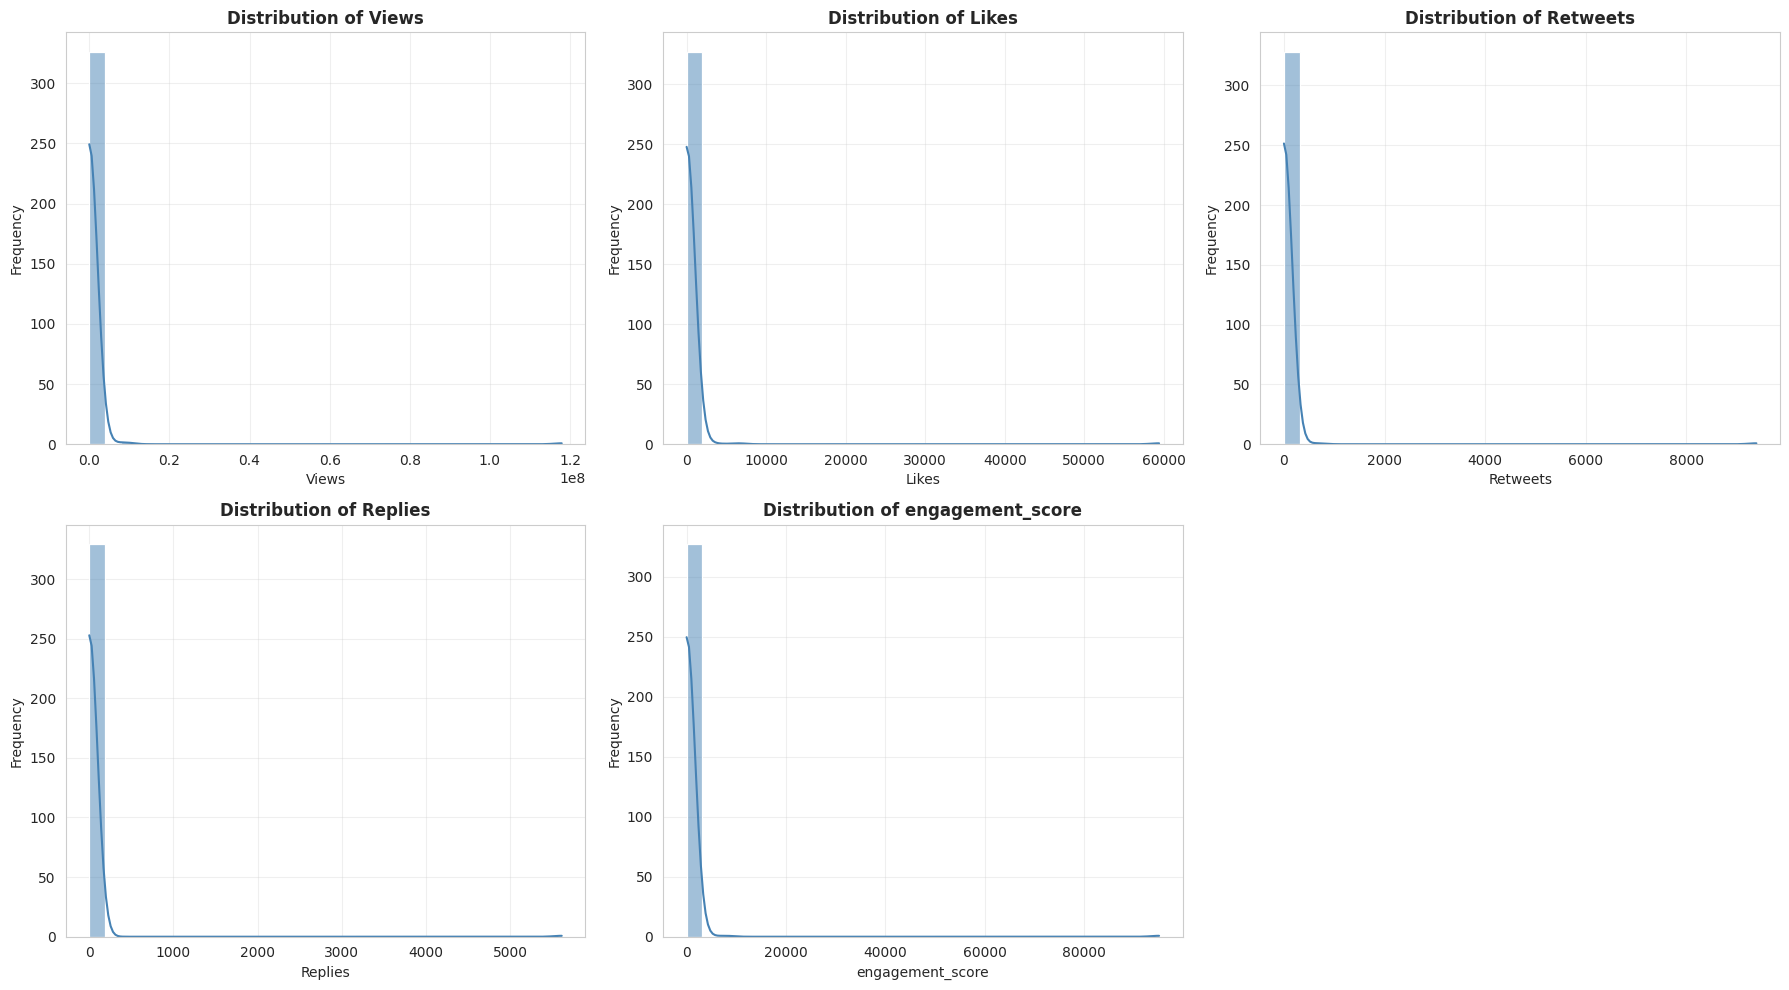

✓ Engagement distribution plot saved


In [ ]:
# Engagement statistics
engagement_cols = ['Views', 'Likes', 'Retweets', 'Replies', 'engagement_score']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(engagement_cols):
    if col in df.columns:
        ax = axes[i]
        sns.histplot(df[col], bins=30, kde=True, ax=ax, color='steelblue')
        ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)

# Hide empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig(utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/figures/engagement_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✓ Engagement distribution plot saved")

## 4. Temporal Analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


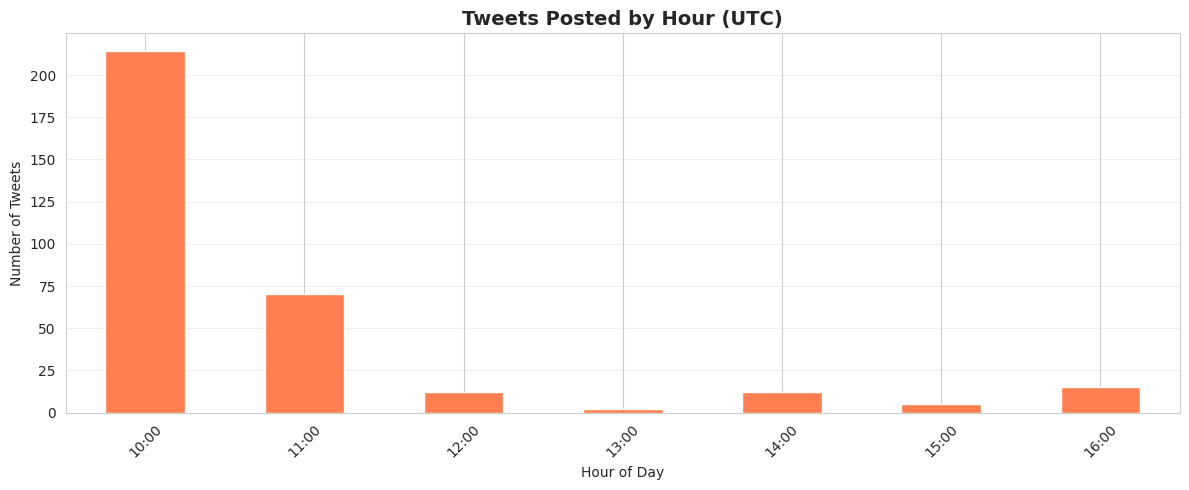

[OK] Temporal analysis plot saved


In [ ]:
# Convert timestamp to datetime
# Use format='mixed' to handle different timestamp formats
df['Tweet Creation Date'] = pd.to_datetime(df['Tweet Creation Date'], format='mixed', utc=True)

# Extract temporal features
df['hour'] = df['Tweet Creation Date'].dt.hour
df['day'] = df['Tweet Creation Date'].dt.day_name()

# Plot tweets by hour
fig, ax = plt.subplots(figsize=(12, 5))
hourly_counts = df['hour'].value_counts().sort_index()
hourly_counts.plot(kind='bar', color='coral', ax=ax)
ax.set_title('Tweets Posted by Hour (UTC)', fontsize=14, fontweight='bold')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Tweets')
# Use actual hour values from data for labels
ax.set_xticklabels([f'{int(h)}:00' for h in hourly_counts.index], rotation=45)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/figures/tweets_by_hour.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("[OK] Temporal analysis plot saved")

## 5. Text Analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


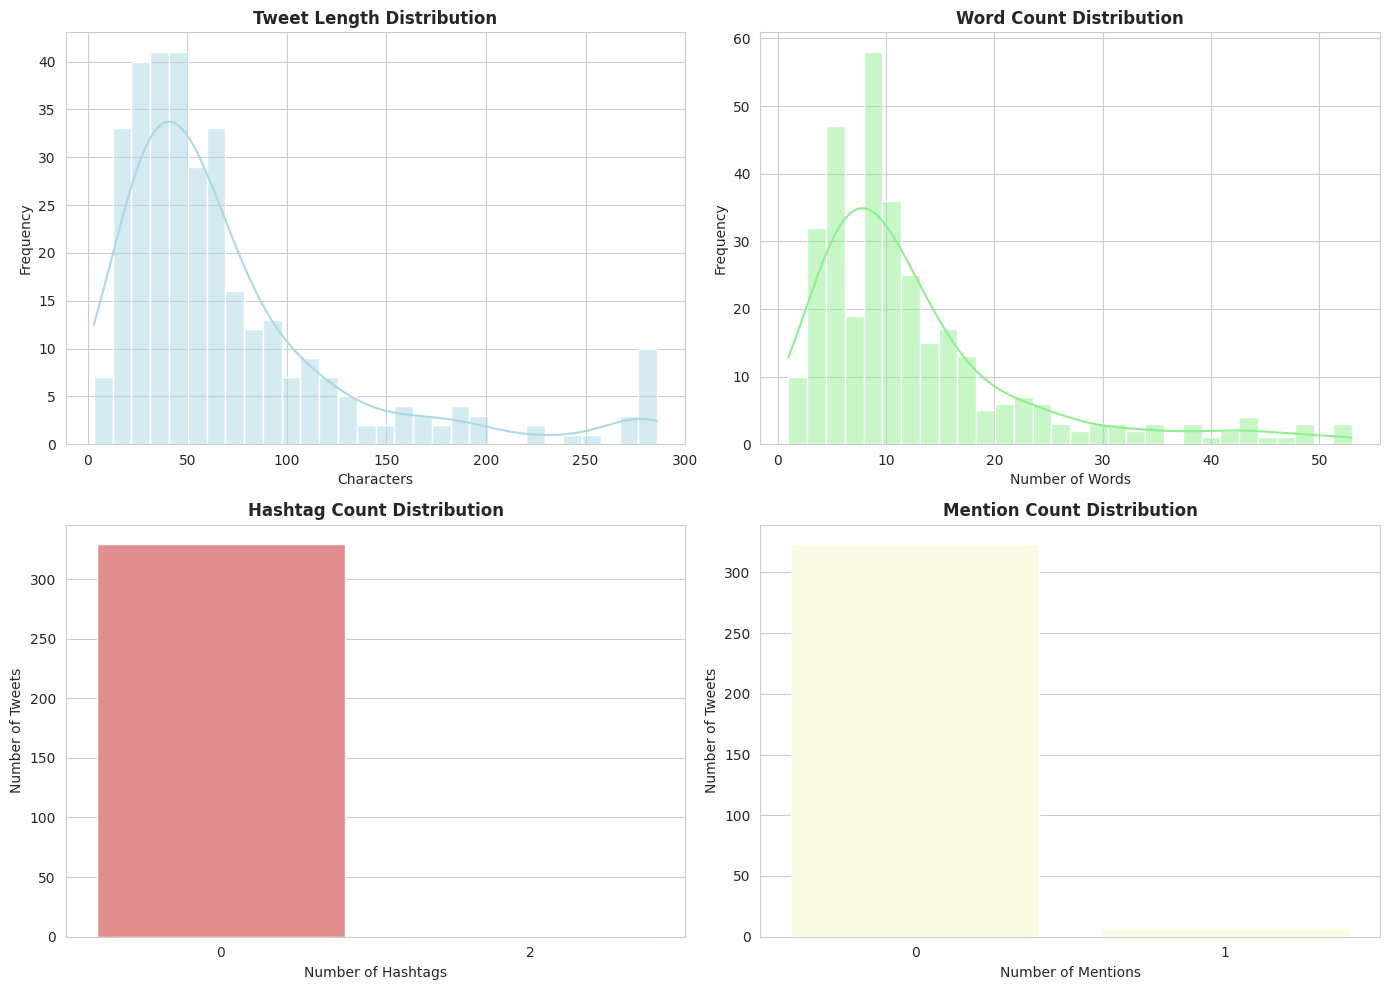

✓ Text statistics plot saved


In [ ]:
# Text statistics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Tweet length distribution
sns.histplot(df['tweet_length'], bins=30, kde=True, color='lightblue', ax=axes[0, 0])
axes[0, 0].set_title('Tweet Length Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Characters')
axes[0, 0].set_ylabel('Frequency')

# Word count distribution
sns.histplot(df['word_count'], bins=30, kde=True, color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Word Count Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Number of Words')
axes[0, 1].set_ylabel('Frequency')

# Hashtag count
sns.countplot(x='hashtag_count', data=df, color='lightcoral', ax=axes[1, 0])
axes[1, 0].set_title('Hashtag Count Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Number of Hashtags')
axes[1, 0].set_ylabel('Number of Tweets')

# Mention count
sns.countplot(x='mention_count', data=df, color='lightyellow', ax=axes[1, 1])
axes[1, 1].set_title('Mention Count Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Number of Mentions')
axes[1, 1].set_ylabel('Number of Tweets')

plt.tight_layout()
plt.savefig(utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/figures/text_statistics.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✓ Text statistics plot saved")

## 6. WordCloud Visualization

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


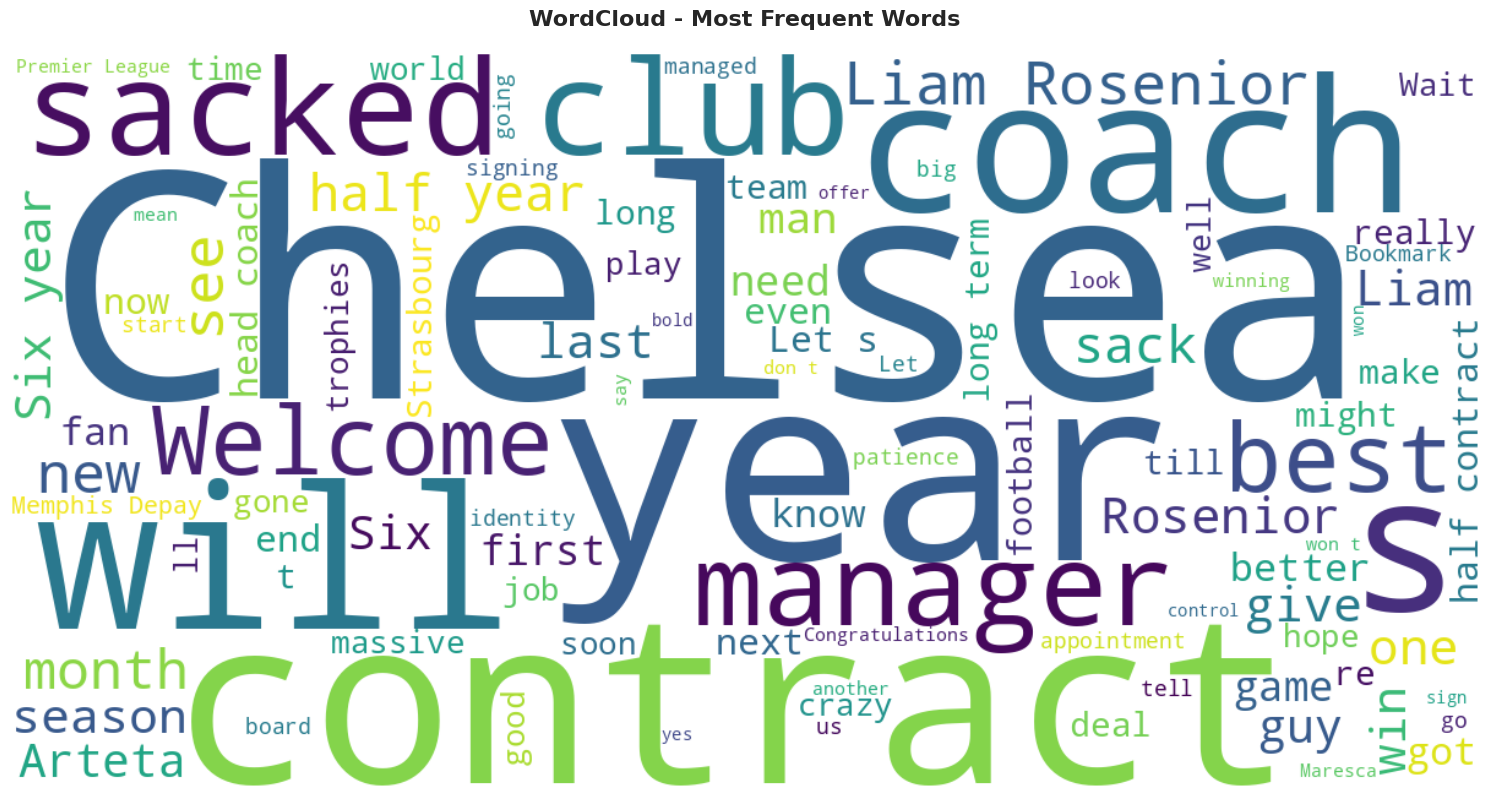

✓ WordCloud saved


In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Combine all tweets into one text
all_text = ' '.join(df['Tweet Content'].astype(str).tolist())

# Create WordCloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=STOPWORDS,
    max_words=100,
    colormap='viridis'
).generate(all_text)

# Plot WordCloud
fig, ax = plt.subplots(figsize=(15, 8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title('WordCloud - Most Frequent Words', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig(utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/figures/wordcloud.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✓ WordCloud saved")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


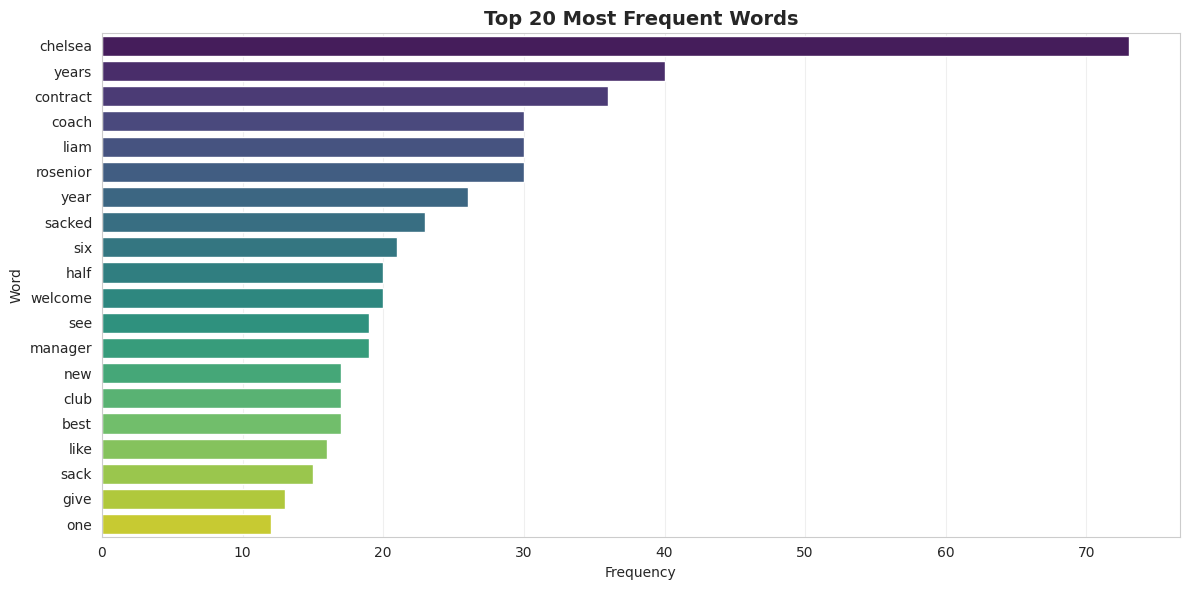

✓ Top words plot saved

Top 20 words:
  chelsea: 73
  years: 40
  contract: 36
  coach: 30
  liam: 30
  rosenior: 30
  year: 26
  sacked: 23
  six: 21
  half: 20
  welcome: 20
  see: 19
  manager: 19
  new: 17
  club: 17
  best: 17
  like: 16
  sack: 15
  give: 13
  one: 12


In [ ]:
# Top 20 most frequent words
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

# Tokenize and remove stopwords
all_words = []
for text in df['Tweet Content'].astype(str):
    words = text.lower().split()
    words = [w for w in words if w.isalpha() and w not in stop_words]
    all_words.extend(words)

# Count word frequencies
word_freq = Counter(all_words)
top_20_words = word_freq.most_common(20)

# Plot top 20 words
fig, ax = plt.subplots(figsize=(12, 6))
words = [w[0] for w in top_20_words]
counts = [w[1] for w in top_20_words]
sns.barplot(
    x=counts,
    y=words,
    hue=words,
    palette='viridis',
    legend=False,
    ax=ax
)
ax.set_title('Top 20 Most Frequent Words', fontsize=14, fontweight='bold')
ax.set_xlabel('Frequency')
ax.set_ylabel('Word')
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig(utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/figures/top_words.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✓ Top words plot saved")
print("\nTop 20 words:")
for word, count in top_20_words:
    print(f"  {word}: {count}")

## 7. N-Gram Analysis

In [ ]:
# Extract bigrams and trigrams
from nltk import bigrams, trigrams

# Prepare text data
all_words_for_ngrams = []
for text in df['Tweet Content'].astype(str):
    words = text.lower().split()
    words = [w for w in words if w.isalpha() and w not in stop_words]
    all_words_for_ngrams.extend(words)

# Generate bigrams
bigram_list = list(bigrams(all_words_for_ngrams))
bigram_freq = Counter(bigram_list)
top_20_bigrams = bigram_freq.most_common(20)

# Generate trigrams
trigram_list = list(trigrams(all_words_for_ngrams))
trigram_freq = Counter(trigram_list)
top_20_trigrams = trigram_freq.most_common(20)

# Prepare data for plotting
bigram_words = [' '.join(bg[0]) for bg in top_20_bigrams]
bigram_counts = [bg[1] for bg in top_20_bigrams]

trigram_words = [' '.join(tg[0]) for tg in top_20_trigrams]
trigram_counts = [tg[1] for tg in top_20_trigrams]

print(f"✓ Extracted {len(bigram_freq)} unique bigrams")
print(f"✓ Extracted {len(trigram_freq)} unique trigrams")

✓ Extracted 1735 unique bigrams
✓ Extracted 1890 unique trigrams


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


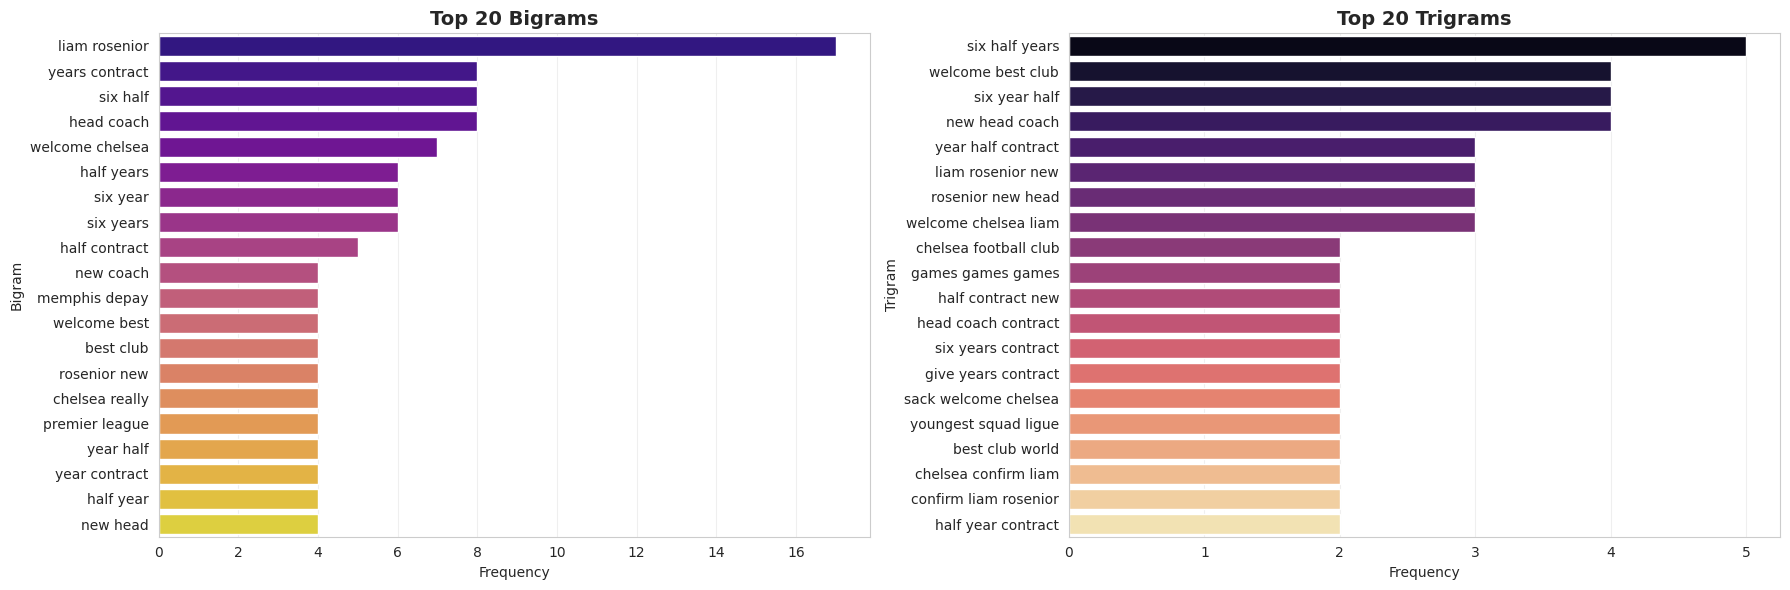

✓ N-grams plot saved


In [ ]:
# Plot bigrams & trigrams
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Bigrams
sns.barplot(
    x=bigram_counts,
    y=bigram_words,
    hue=bigram_words,
    palette='plasma',
    legend=False,
    ax=ax1
)
ax1.set_title('Top 20 Bigrams', fontsize=14, fontweight='bold')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Bigram')
ax1.grid(True, alpha=0.3, axis='x')

# Trigrams
sns.barplot(
    x=trigram_counts,
    y=trigram_words,
    hue=trigram_words,
    palette='magma',
    legend=False,
    ax=ax2
)
ax2.set_title('Top 20 Trigrams', fontsize=14, fontweight='bold')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Trigram')
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig(utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/figures/ngrams.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print("✓ N-grams plot saved")

## 8. Save EDA Summary

In [ ]:
# Create EDA summary
eda_summary = {
    'total_tweets': len(df),
    'avg_tweet_length': df['tweet_length'].mean(),
    'avg_word_count': df['word_count'].mean(),
    'avg_likes': df['Likes'].mean(),
    'avg_retweets': df['Retweets'].mean(),
    'avg_replies': df['Replies'].mean(),
    'total_likes': df['Likes'].sum(),
    'total_retweets': df['Retweets'].sum(),
    'total_replies': df['Replies'].sum()
}

# Save to CSV
eda_df = pd.DataFrame([eda_summary])
eda_df.to_csv(utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/tables/eda_summary.csv'), index=False)

print("\n" + "="*60)
print("EDA SUMMARY")
print("="*60)
for key, value in eda_summary.items():
    print(f"{key}: {value:.2f}")
print("="*60)

print("\n✓ EDA summary saved to outputs/tables/eda_summary.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

EDA SUMMARY
total_tweets: 330.00
avg_tweet_length: 70.68
avg_word_count: 12.79
avg_likes: 249.42
avg_retweets: 32.88
avg_replies: 19.29
total_likes: 82310.00
total_retweets: 10849.00
total_replies: 6365.00

✓ EDA summary saved to outputs/tables/eda_summary.csv


# Step 2 : Sentiment Labeling with VADER
Objetives:
1. Load cleaned dataset
2. Apply VADER sentiment analysis
3. Categorize sentiment (Positive/Neutral/Negative)
4. Analyze sentiment distribution
5. Explore sentiment by features
6. Save labeled dataset


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add project root to Python path for proper module imports
project_root = os.path.dirname(os.getcwd())  # Go up one level from notebooks/
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import custom modules
from src import utils, preprocessing, feature_engineering, models

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 150)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Cleaned Dataset

In [ ]:
# Load cleaned dataset
data_path = utils.get_processed_data_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/data/processed/tweets_cleaned.csv')
df = pd.read_csv(data_path)

print(f"\n{'='*60}")
print(f"DATASET LOADED")
print(f"{'='*60}")
print(f"Total tweets: {len(df)}")
print(f"{'='*60}\n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

DATASET LOADED
Total tweets: 330



## 2. Apply VADER Sentiment Analysis

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get VADER sentiment score
def get_vader_sentiment(text):
    """
    Get VADER sentiment scores for a given text.

    Returns:
        dict: Dictionary containing neg, neu, pos, and compound scores
    """
    if not isinstance(text, str):
        text = str(text)
    return analyzer.polarity_scores(text)

# Apply VADER to all tweets
print("Applying VADER sentiment analysis...")
vader_scores = df['Tweet Content'].apply(get_vader_sentiment)

# Extract individual scores
df['vader_neg'] = vader_scores.apply(lambda x: x['neg'])
df['vader_neu'] = vader_scores.apply(lambda x: x['neu'])
df['vader_pos'] = vader_scores.apply(lambda x: x['pos'])
df['vader_compound'] = vader_scores.apply(lambda x: x['compound'])

print("✓ VADER sentiment scores calculated")
print(f"\nSample scores:")
print(df[['Tweet Content', 'vader_compound']].head(10))

Applying VADER sentiment analysis...
✓ VADER sentiment scores calculated

Sample scores:
                                                                                                                                           Tweet Content  \
0                                                                                                   We tried to stop it from overthinking.\n\nWe failed.   
1                                         I predicted this\nThey need some one they can control without him battling and eye.\nThey need a 'yes sir' man   
2                            Well, hope this new coach meets the expectation of the board and fans. Big coaches tend to turn down the chelsea job offer.   
3  Chelsea always sign coaches for 6 and half years before they'll fire them a year later after disastrous campaign. I pray he managed to see till De...   
4                                                                                                I give him till the next internati

## 3. Categorize Sentiment

In [ ]:
# Define sentiment categories based on compound score
# Thresholds (commonly used in literature):
# - compound >= 0.05: Positive
# - compound <= -0.05: Negative
# - -0.05 < compound < 0.05: Neutral

def categorize_sentiment(compound_score):
    """
    Categorize sentiment based on VADER compound score.
    """
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply categorization
df['sentiment'] = df['vader_compound'].apply(categorize_sentiment)

print("✓ Sentiment categorized")
print(f"\nSentiment distribution:")
print(df['sentiment'].value_counts().to_string())

✓ Sentiment categorized

Sentiment distribution:
sentiment
Positive    152
Neutral     131
Negative     47


## 4. Analyze Sentiment Distribution

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


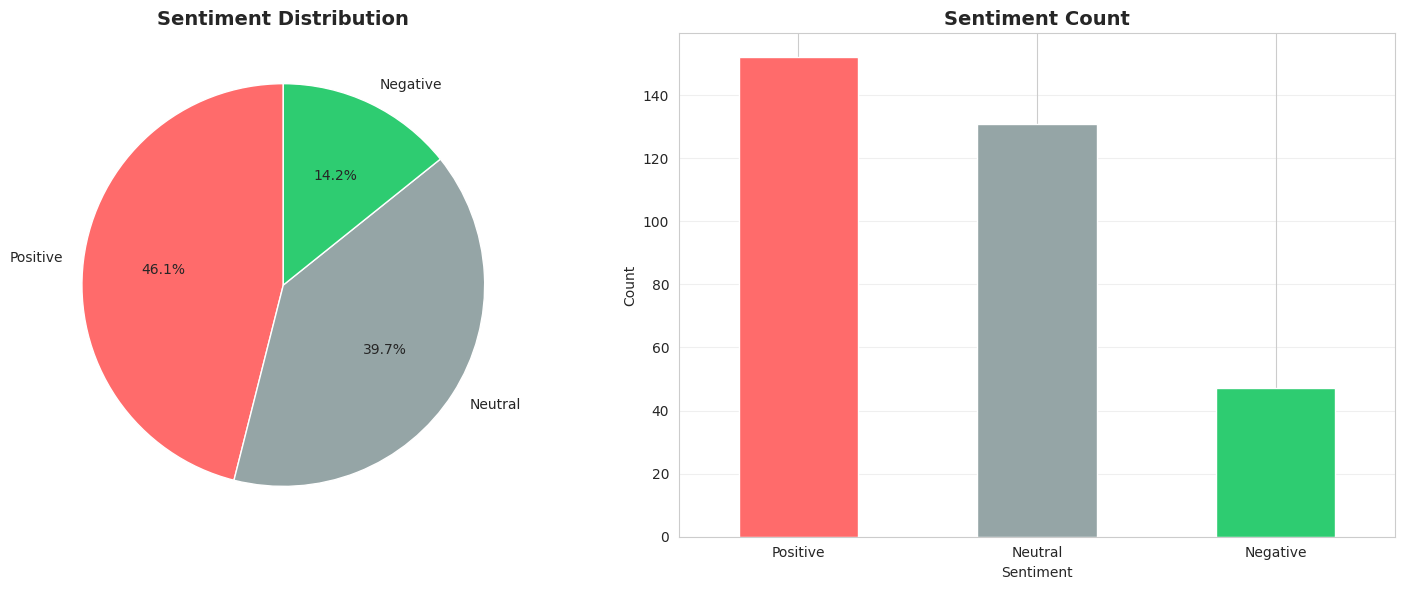

✓ Sentiment distribution plot saved


In [ ]:
# Sentiment distribution pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
sentiment_counts = df['sentiment'].value_counts()
colors = ['#ff6b6b', '#95a5a6', '#2ecc71']  # Red, Gray, Green
sentiment_counts.plot(kind='pie', ax=ax1, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
ax1.set_ylabel('')

# Bar chart
sentiment_counts.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Sentiment Count', fontsize=14, fontweight='bold')
ax2.set_xlabel('Sentiment')
ax2.set_ylabel('Count')
ax2.set_xticklabels(sentiment_counts.index, rotation=0)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/figures/sentiment_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✓ Sentiment distribution plot saved")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


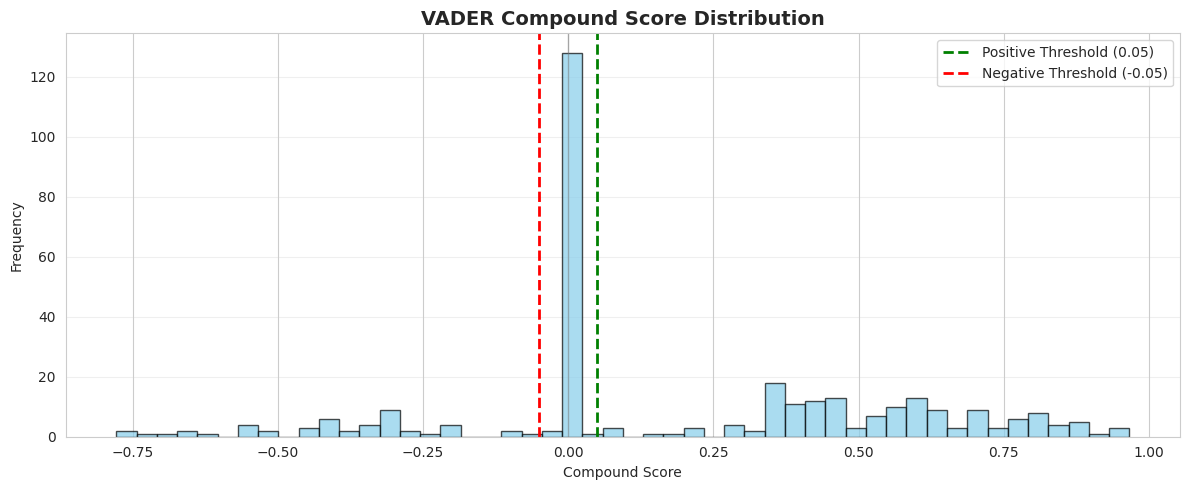

✓ Compound score distribution plot saved


In [ ]:
# Compound score distribution
fig, ax = plt.subplots(figsize=(12, 5))

# Histogram
ax.hist(df['vader_compound'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax.axvline(x=0.05, color='green', linestyle='--', linewidth=2, label='Positive Threshold (0.05)')
ax.axvline(x=-0.05, color='red', linestyle='--', linewidth=2, label='Negative Threshold (-0.05)')
ax.axvline(x=0, color='gray', linestyle='-', linewidth=1, alpha=0.5)

ax.set_title('VADER Compound Score Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Compound Score')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/figures/compound_score_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✓ Compound score distribution plot saved")

## 5. Explore Sentiment by Features

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


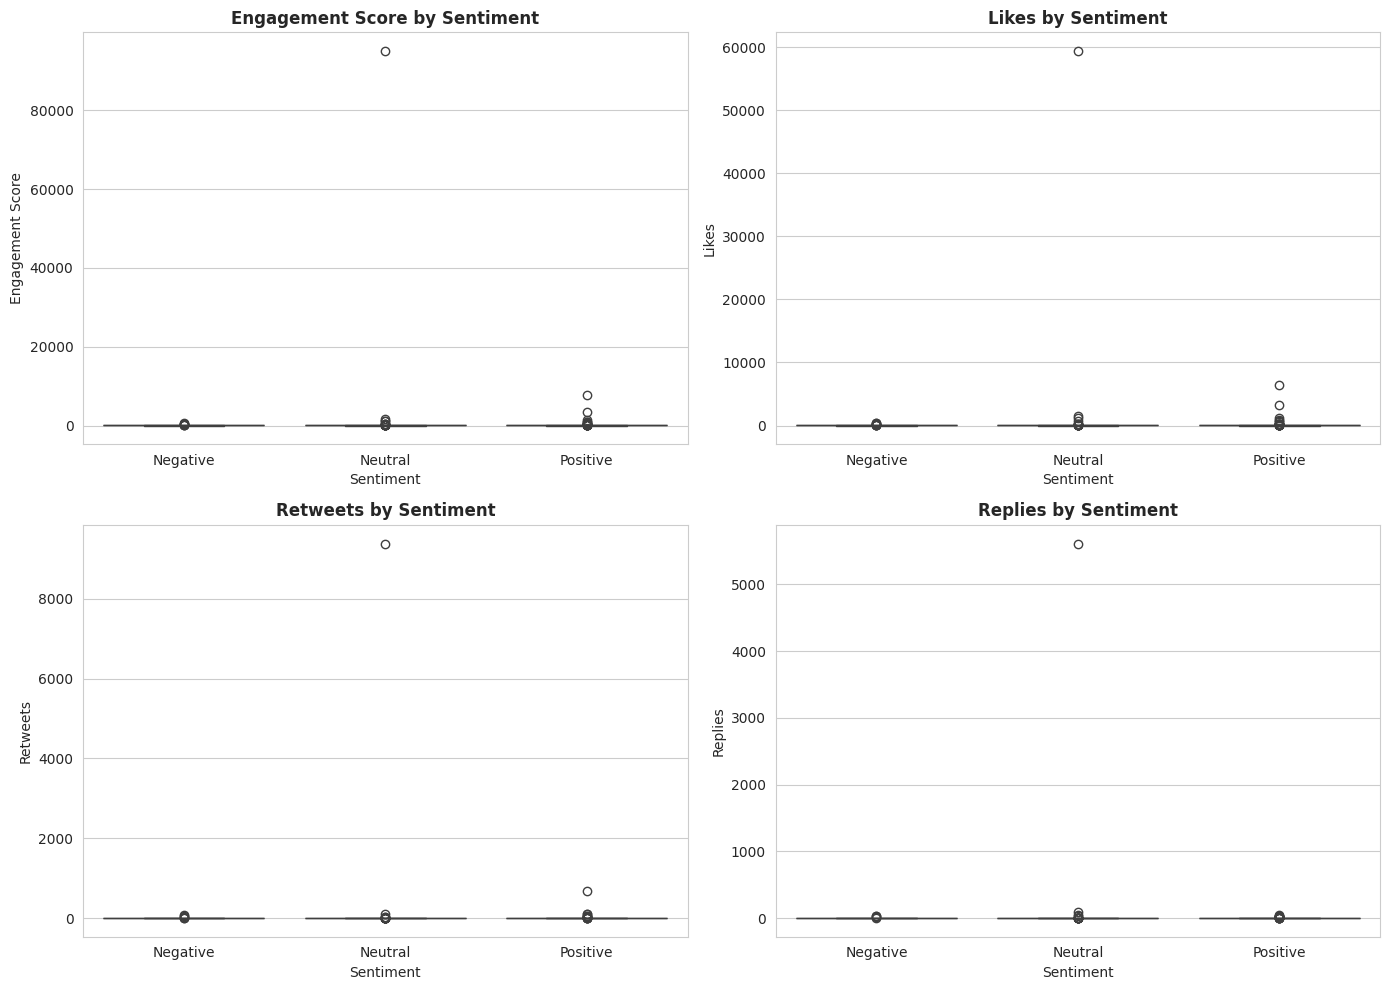

✓ Sentiment by engagement plot saved


In [ ]:
# Sentiment by engagement
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Engagement score
sns.boxplot(x='sentiment', y='engagement_score', data=df, order=['Negative', 'Neutral', 'Positive'], ax=axes[0, 0])
axes[0, 0].set_title('Engagement Score by Sentiment', fontweight='bold')
axes[0, 0].set_xlabel('Sentiment')
axes[0, 0].set_ylabel('Engagement Score')

# Likes
sns.boxplot(x='sentiment', y='Likes', data=df, order=['Negative', 'Neutral', 'Positive'], ax=axes[0, 1])
axes[0, 1].set_title('Likes by Sentiment', fontweight='bold')
axes[0, 1].set_xlabel('Sentiment')
axes[0, 1].set_ylabel('Likes')

# Retweets
sns.boxplot(x='sentiment', y='Retweets', data=df, order=['Negative', 'Neutral', 'Positive'], ax=axes[1, 0])
axes[1, 0].set_title('Retweets by Sentiment', fontweight='bold')
axes[1, 0].set_xlabel('Sentiment')
axes[1, 0].set_ylabel('Retweets')

# Replies
sns.boxplot(x='sentiment', y='Replies', data=df, order=['Negative', 'Neutral', 'Positive'], ax=axes[1, 1])
axes[1, 1].set_title('Replies by Sentiment', fontweight='bold')
axes[1, 1].set_xlabel('Sentiment')
axes[1, 1].set_ylabel('Replies')

plt.tight_layout()
plt.savefig(utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/figures/sentiment_by_engagement.png'), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("✓ Sentiment by engagement plot saved")

## 6. Sample Tweets by Sentiment

In [ ]:
# Display sample tweets for each sentiment
for sentiment in ['Positive', 'Neutral', 'Negative']:
    print(f"\n{'='*60}")
    print(f"SAMPLE {sentiment.upper()} TWEETS")
    print(f"{'='*60}")

    sentiment_df = df[df['sentiment'] == sentiment]

    for idx, row in sentiment_df.head(5).iterrows():
        print(f"\n[{row['sentiment']}] Compound: {row['vader_compound']:.3f}")
        print(f"Tweet: {row['Tweet Content'][:150]}...")
        if 'engagement_score' in df.columns:
            print(f"Engagement: {row['engagement_score']}")
    print()



SAMPLE POSITIVE TWEETS

[Positive] Compound: 0.544
Tweet: I predicted this
They need some one they can control without him battling and eye.
They need a 'yes sir' man...
Engagement: 1

[Positive] Compound: 0.612
Tweet: Well, hope this new coach meets the expectation of the board and fans. Big coaches tend to turn down the chelsea job offer....
Engagement: 0

[Positive] Compound: 0.226
Tweet: Win-win cooperation, surprises....
Engagement: 1

[Positive] Compound: 0.361
Tweet: 6 years & half contract like they won’t sack him before 2027...
Engagement: 3

[Positive] Compound: 0.670
Tweet: Six and a half years at Chelsea? bold. very bold. see you in november....
Engagement: 3


SAMPLE NEUTRAL TWEETS

[Neutral] Compound: 0.000
Tweet: I give him till the next international break, march max...
Engagement: 1

[Neutral] Compound: 0.000
Tweet: What's the probability of him being sacked before june on a scale of 1-10? 
@grok...
Engagement: 3

[Neutral] Compound: 0.000
Tweet: This one will not las

## 7. Save Labeled Dataset

In [ ]:
# Save labeled dataset
output_path = utils.get_processed_data_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/data/processed/tweets_labeled.csv')
df.to_csv(output_path, index=False)

print(f"\n{'='*60}")
print(f"✓ Labeled dataset saved to: {output_path}")
print(f"  - Total tweets: {len(df)}")
print(f"  - Columns: {list(df.columns)}")
print(f"{'='*60}\n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✓ Labeled dataset saved to: /content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/data/processed/tweets_labeled.csv
  - Total tweets: 330
  - Columns: ['Tweet Link', 'Author Handle', 'Tweet Content', 'Views', 'Likes', 'Retweets', 'Replies', 'Tweet Creation Date', 'Scraped Date', 'engagement_score', 'tweet_length', 'word_count', 'hashtag_count', 'mention_count', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'sentiment']



## 8. Sentiment Summary Statistics

In [ ]:
# Create sentiment summary
sentiment_summary = df.groupby('sentiment').agg({
    'Tweet Content': 'count',
    'vader_compound': ['mean', 'std', 'min', 'max'],
    'Likes': 'mean',
    'Retweets': 'mean',
    'Replies': 'mean',
    'engagement_score': 'mean'
}).round(4)

sentiment_summary.columns = ['count', 'mean_compound', 'std_compound', 'min_compound', 'max_compound',
                         'mean_likes', 'mean_retweets', 'mean_replies', 'mean_engagement']

print("\n" + "="*60)
print("SENTIMENT SUMMARY STATISTICS")
print("="*60)
print(sentiment_summary.to_string())
print("="*60)

# Save to CSV
sentiment_summary.to_csv(utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/tables/sentiment_summary.csv'))
print("\n✓ Sentiment summary saved to outputs/tables/sentiment_summary.csv")


SENTIMENT SUMMARY STATISTICS
           count  mean_compound  std_compound  min_compound  max_compound  mean_likes  mean_retweets  mean_replies  mean_engagement
sentiment                                                                                                                          
Negative      47        -0.3971        0.1739       -0.7783       -0.0772     38.7021         3.7021        2.7234          54.2766
Neutral      131        -0.0000        0.0038       -0.0258        0.0258    492.6260        72.9771       44.8550         773.1450
Positive     152         0.5430        0.1948        0.0772        0.9661    104.9803         7.3355        2.3750         126.7763
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✓ Sentiment summary saved to outputs/tables/sentiment_summary.csv


# Step 4 : Machine Learning Modeling
Objectives:
1. Load labeled dataset
2. Prepare data for ML
3. Train-Test split
4. Feature extraction (TF-IDF, Count)
5. Train Logistic Regression
6. Train Multinomial Naive Bayes
7. Compare model performance
8. Save trained models

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add project root to Python path for proper module imports
project_root = os.path.dirname(os.getcwd())  # Go up one level from notebooks/
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import custom modules
from src import utils, preprocessing, feature_engineering, models

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 150)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Labeled Dataset

In [ ]:
# Load labeled dataset
data_path = utils.get_processed_data_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/data/processed/tweets_labeled.csv')
df = pd.read_csv(data_path)

print(f"\n{'='*60}")
print(f"DATASET LOADED")
print(f"{'='*60}")
print(f"Total tweets: {len(df)}")
print(f"\nSentiment distribution:")
print(df['sentiment'].value_counts().to_string())
print(f"\n{'='*60}\n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

DATASET LOADED
Total tweets: 330

Sentiment distribution:
sentiment
Positive    152
Neutral     131
Negative     47




## 2. Prepare Data for ML

In [ ]:
# Ensure we have cleaned text
if 'Tweet Content Cleaned' not in df.columns:
    from src.preprocessing import clean_text
    print("Cleaning tweet text...")
    df['Tweet Content Cleaned'] = df['Tweet Content'].apply(clean_text)
    print("✓ Text cleaned")

# Prepare features and labels
X = df['Tweet Content Cleaned']
y = df['sentiment']

# Encode labels (Negative: 0, Neutral: 1, Positive: 2)
label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_encoded = y.map(label_map)

print(f"\nFeatures shape: {X.shape}")
print(f"Labels shape: {y_encoded.shape}")
print(f"\nLabel encoding:")
for label, code in label_map.items():
    print(f"  {label}: {code}")

Cleaning tweet text...
✓ Text cleaned

Features shape: (330,)
Labels shape: (330,)

Label encoding:
  Negative: 0
  Neutral: 1
  Positive: 2


## 3. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print(f"\n{'='*60}")
print(f"TRAIN-TEST SPLIT")
print(f"{'='*60}")
print(f"Training set: {len(X_train)} tweets ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} tweets ({len(X_test)/len(X)*100:.1f}%)")

# Check class distribution
print(f"\nTraining set distribution:")
train_dist = pd.Series(y_train).value_counts().sort_index()
for code, count in train_dist.items():
    label = list(label_map.keys())[list(label_map.values()).index(code)]
    print(f"  {label}: {count} ({count/len(y_train)*100:.1f}%)")

print(f"\nTest set distribution:")
test_dist = pd.Series(y_test).value_counts().sort_index()
for code, count in test_dist.items():
    label = list(label_map.keys())[list(label_map.values()).index(code)]
    print(f"  {label}: {count} ({count/len(y_test)*100:.1f}%)")

print(f"{'='*60}\n")


TRAIN-TEST SPLIT
Training set: 264 tweets (80.0%)
Test set: 66 tweets (20.0%)

Training set distribution:
  Negative: 37 (14.0%)
  Neutral: 105 (39.8%)
  Positive: 122 (46.2%)

Test set distribution:
  Negative: 10 (15.2%)
  Neutral: 26 (39.4%)
  Positive: 30 (45.5%)



## 4. Feature Extraction

In [ ]:
# TF-IDF Vectorization (for Logistic Regression)
print("Creating TF-IDF features...")
X_train_tfidf, X_test_tfidf, tfidf_vectorizer = feature_engineering.create_tfidf_features(
    X_train, X_test,
    max_features=500,
    ngram_range=(1, 2)
)

# Count Vectorization (for Naive Bayes)
print("\nCreating Count features...")
X_train_count, X_test_count, count_vectorizer = feature_engineering.create_count_features(
    X_train, X_test,
    max_features=500
)

print(f"\nTF-IDF shape: {X_train_tfidf.shape}")
print(f"Count shape: {X_train_count.shape}")

Creating TF-IDF features...
Creating TF-IDF features (max_features=500, ngram_range=(1, 2))...
✓ TF-IDF features created: 310 features

Creating Count features...
Creating Count features (max_features=500)...
✓ Count features created: 229 features

TF-IDF shape: (264, 310)
Count shape: (264, 229)


## 5. Train Logistic Regression


=== Training Logistic Regression ===

Performing hyperparameter tuning...
✓ Best parameters: {'C': 1, 'max_iter': 100, 'random_state': 42, 'solver': 'lbfgs'}
✓ Best CV accuracy: 0.6705

=== Evaluating Logistic Regression ===

Accuracy:  0.6515
Precision: 0.6998
Recall:    0.6515
F1-Score:  0.6165

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.65      0.77      0.70        26
           2       0.65      0.73      0.69        30

    accuracy                           0.65        66
   macro avg       0.76      0.53      0.52        66
weighted avg       0.70      0.65      0.62        66

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Confusion matrix saved to: /content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/figures/lr_confusion_matrix.png


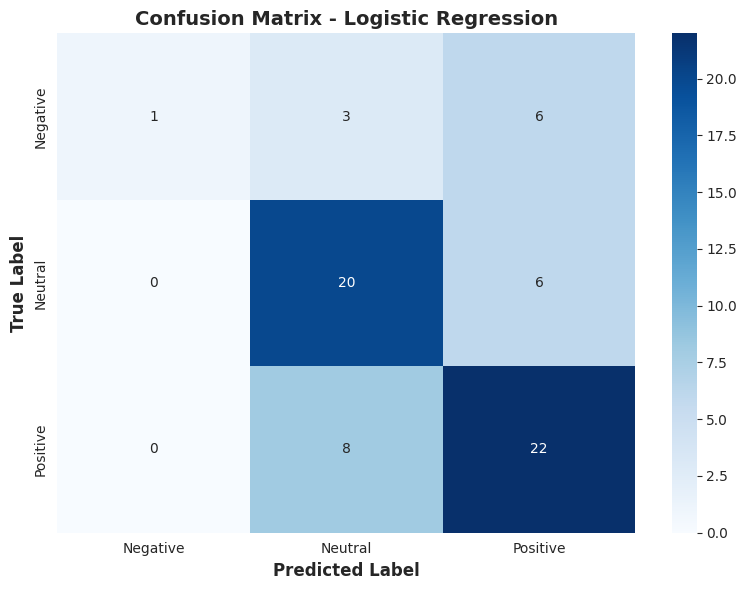

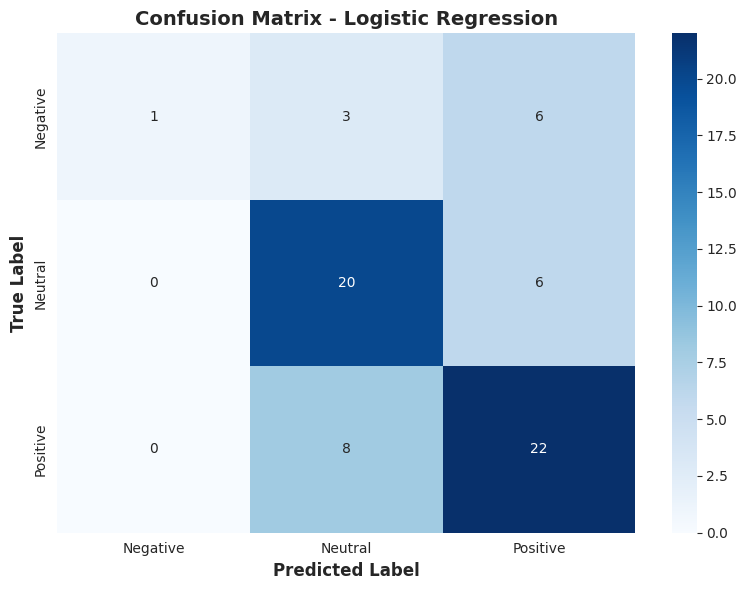

In [ ]:
# Train Logistic Regression with hyperparameter tuning
lr_model, lr_grid_search = models.train_logistic_regression(X_train_tfidf, y_train)

# Evaluate on test set
lr_metrics = models.evaluate_model(lr_model, X_test_tfidf, y_test, "Logistic Regression")

# Plot confusion matrix
models.plot_confusion_matrix(
    y_test,
    lr_model.predict(X_test_tfidf),
    "Logistic Regression",
    save_path=utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/figures/lr_confusion_matrix.png')
)

## 6. Train Multinomial Naive Bayes


=== Training Multinomial Naive Bayes ===

Performing hyperparameter tuning...
✓ Best parameters: {'alpha': 0.1, 'fit_prior': True}
✓ Best CV accuracy: 0.6134

=== Evaluating Multinomial Naive Bayes ===

Accuracy:  0.6212
Precision: 0.6473
Recall:    0.6212
F1-Score:  0.6226

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.30      0.27        10
           1       0.78      0.54      0.64        26
           2       0.67      0.80      0.73        30

    accuracy                           0.62        66
   macro avg       0.56      0.55      0.55        66
weighted avg       0.65      0.62      0.62        66

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Confusion matrix saved to: /content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/figures/nb_confusion_matrix.png


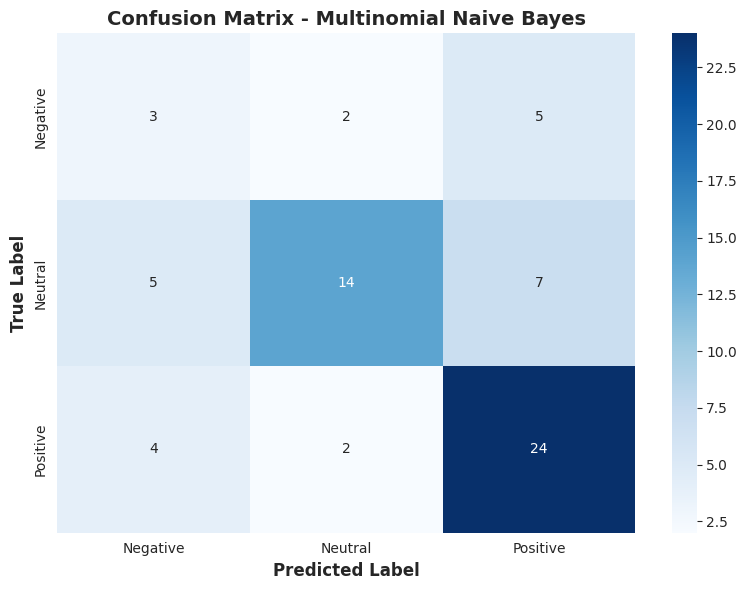

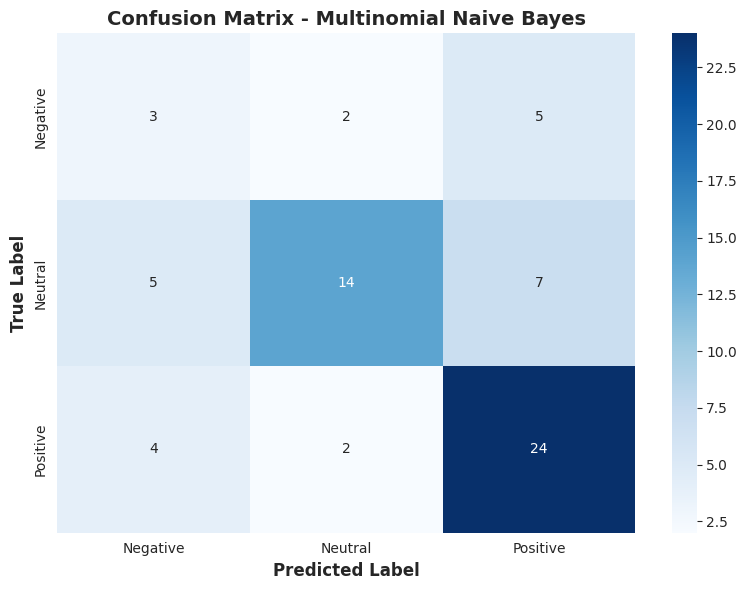

In [ ]:
# Train Naive Bayes with hyperparameter tuning
nb_model, nb_grid_search = models.train_naive_bayes(X_train_count, y_train)

# Evaluate on test set
nb_metrics = models.evaluate_model(nb_model, X_test_count, y_test, "Multinomial Naive Bayes")

# Plot confusion matrix
models.plot_confusion_matrix(
    y_test,
    nb_model.predict(X_test_count),
    "Multinomial Naive Bayes",
    save_path=utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/figures/nb_confusion_matrix.png')
)

## 7. Compare Model Performance


=== Model Comparison ===

                  model  accuracy  precision  recall  f1_score
    Logistic Regression    0.6515     0.6998  0.6515    0.6165
Multinomial Naive Bayes    0.6212     0.6473  0.6212    0.6226

✓ Best Model: Logistic Regression (Accuracy: 0.6515)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Model comparison plot saved to: /content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/figures/model_comparison.png


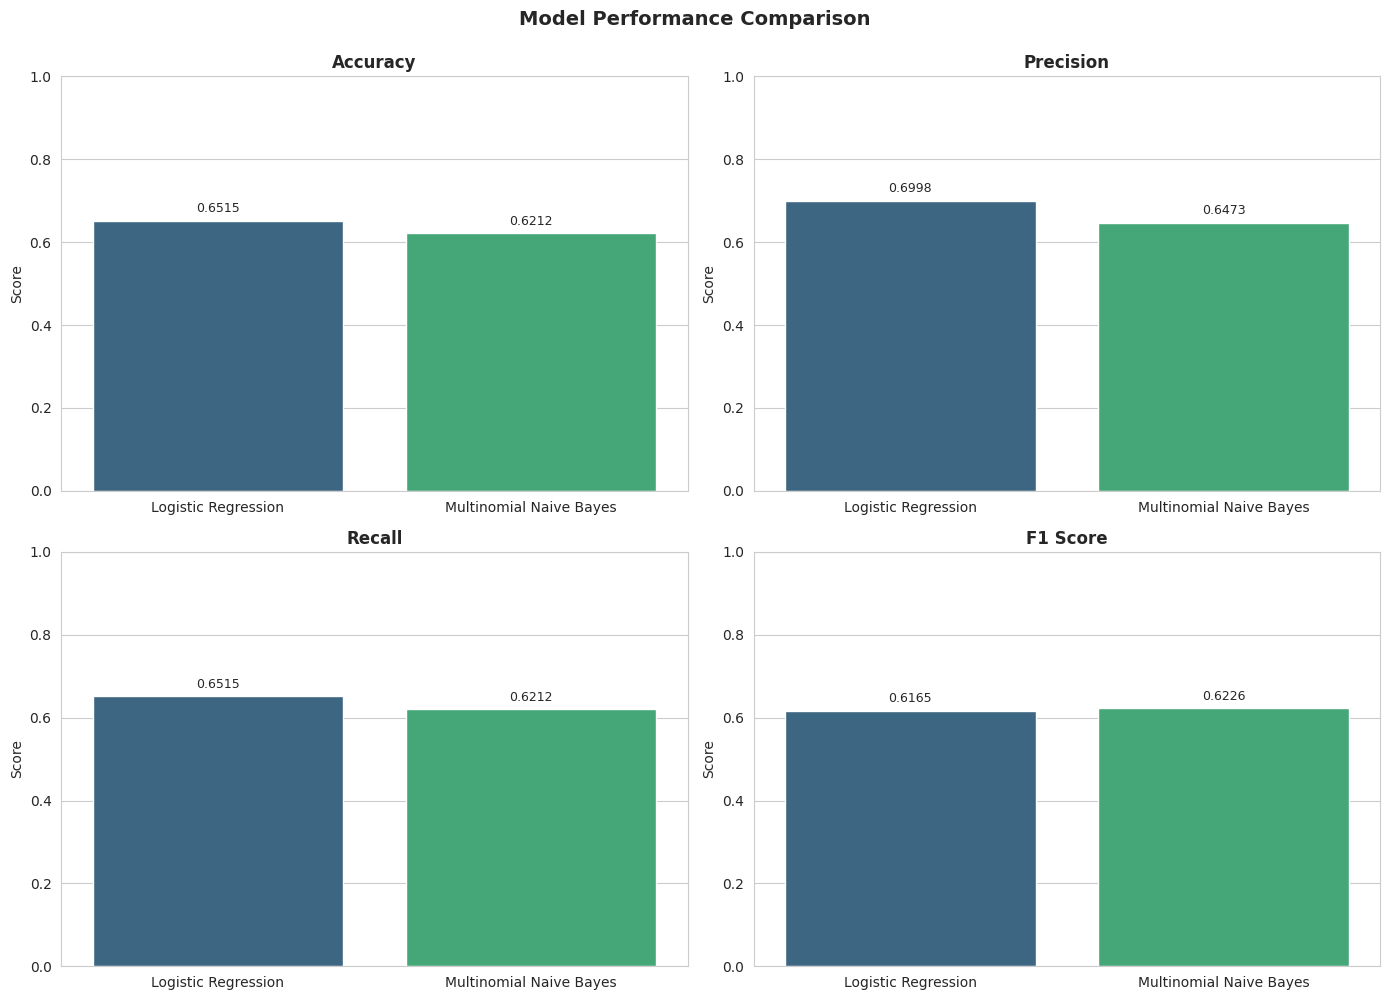

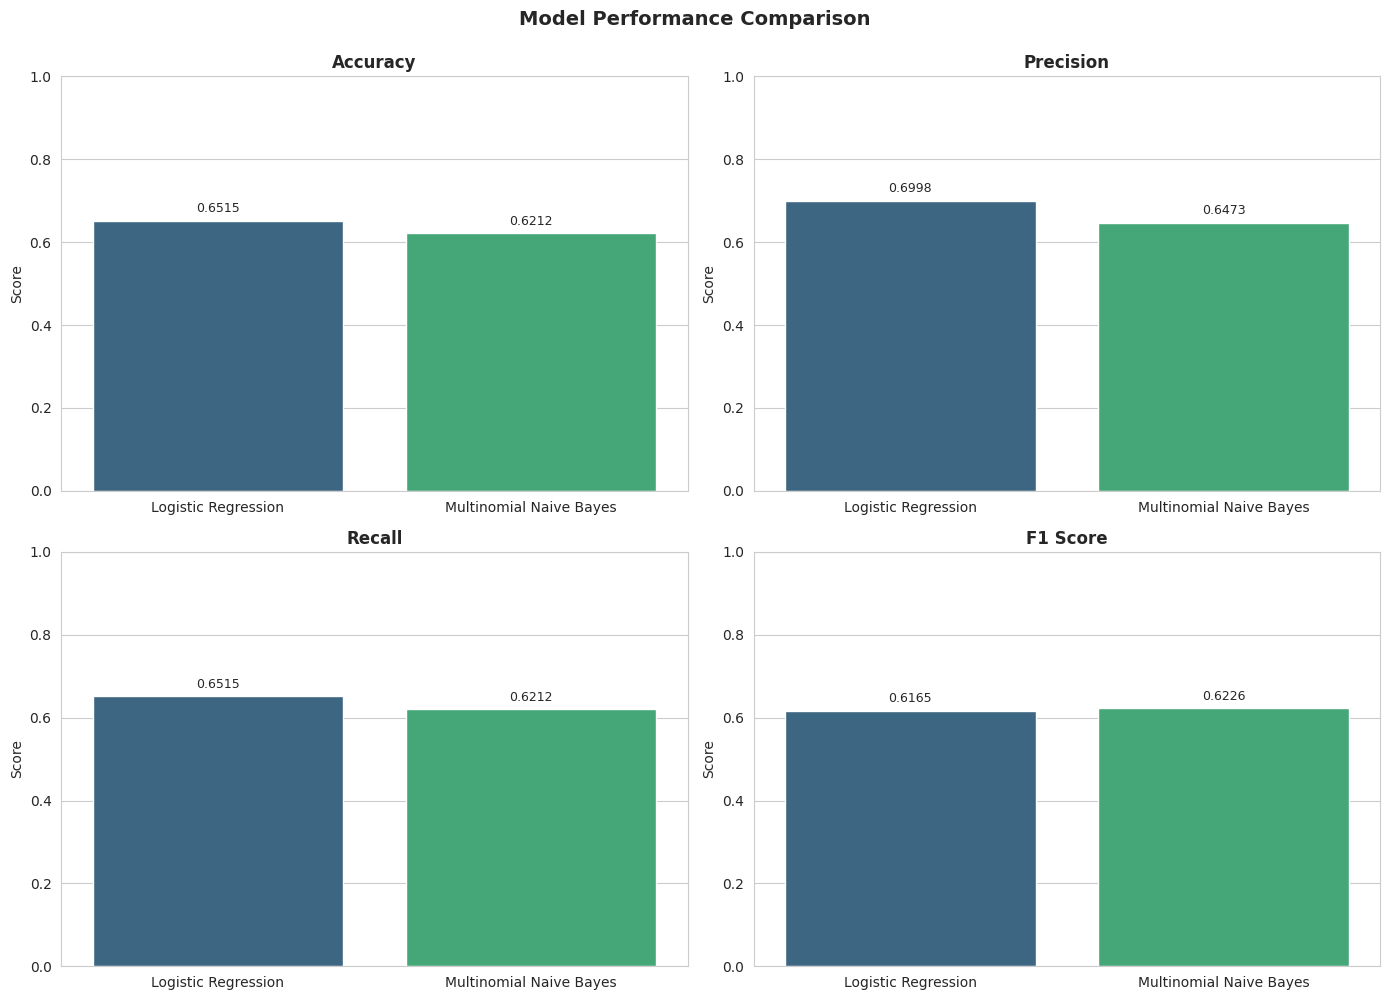

In [ ]:
# Compare models
comparison_df = models.compare_models([lr_metrics, nb_metrics])

# Plot comparison
models.plot_model_comparison(
    comparison_df,
    save_path=utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/figures/model_comparison.png')
)

## 8. Feature Importance Analysis

Extracting top 20 important features...
✓ Top features extracted
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


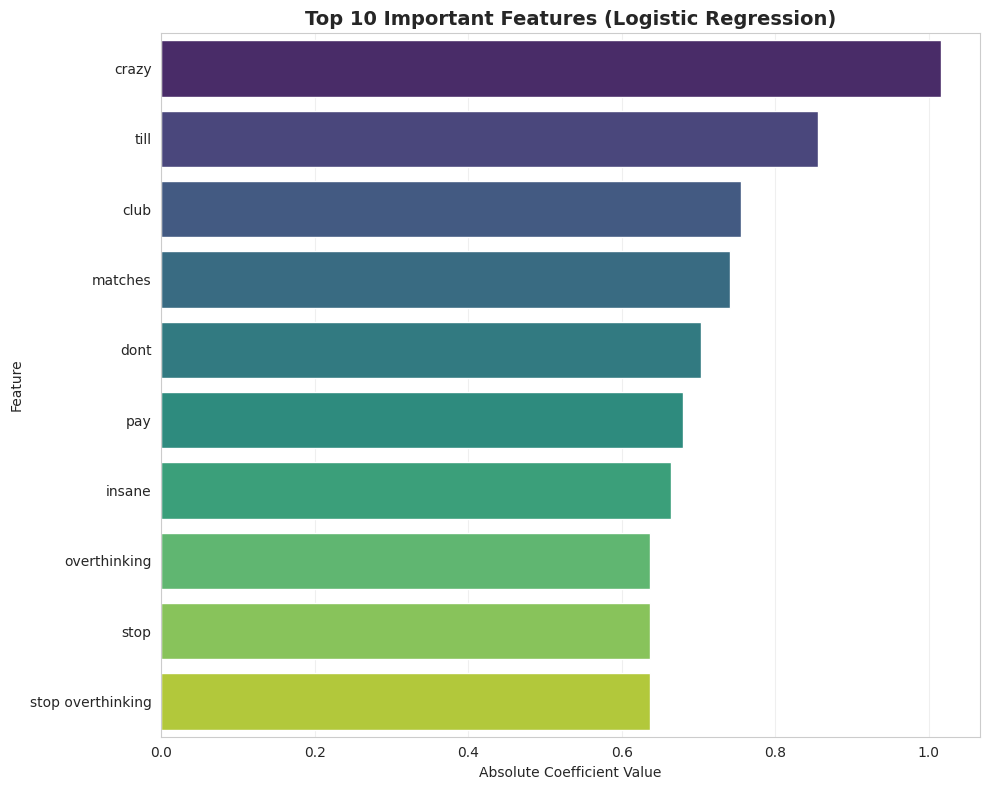


✓ Feature importance plot saved

Top 10 features:
          feature  importance
            crazy    1.015953
             till    0.855436
             club    0.755321
          matches    0.741598
             dont    0.703508
              pay    0.680244
           insane    0.663901
     overthinking    0.636309
             stop    0.636309
stop overthinking    0.636309


In [ ]:
# Get top features for Logistic Regression
top_features_lr = feature_engineering.get_feature_importance(
    tfidf_vectorizer,
    lr_model,
    n_top=20
)

if top_features_lr is not None:
    # Plot top features
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.barplot(
    x='importance',
    y='feature',
    hue='feature',
    data=top_features_lr.head(10),
    palette='viridis',
    legend=False,
    ax=ax
    )
    ax.set_title('Top 10 Important Features (Logistic Regression)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Absolute Coefficient Value')
    ax.set_ylabel('Feature')
    ax.grid(True, alpha=0.3, axis='x')

    plt.tight_layout()
    plt.savefig(utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/figures/feature_importance.png'), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    print("\n✓ Feature importance plot saved")
    print("\nTop 10 features:")
    print(top_features_lr.head(10).to_string(index=False))

## 9. Save Trained Models

In [ ]:
# Save models
models.save_model(lr_model, 'logistic_regression', save_dir=utils.get_outputs_path('models'))
models.save_model(nb_model, 'naive_bayes', save_dir=utils.get_outputs_path('models'))

# Save vectorizers
import joblib
joblib.dump(tfidf_vectorizer, utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/models/tfidf_vectorizer.pkl'))
joblib.dump(count_vectorizer, utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/models/count_vectorizer.pkl'))

print("\n✓ Vectorizers saved")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Model saved to: /content/drive/MyDrive/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/models/logistic_regression.pkl
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Model saved to: /content/drive/MyDrive/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/models/naive_bayes.pkl
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✓ Vectorizers saved


## 10. Save Metrics

In [ ]:
# Save metrics to JSON
models.save_metrics([lr_metrics, nb_metrics], save_dir=utils.get_outputs_path('metrics'))

# Save comparison table to CSV
comparison_df.to_csv(utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/tables/model_comparison.csv'), index=False)

print(f"\n✓ Model comparison saved to outputs/tables/model_comparison.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Metrics saved to: /content/drive/MyDrive/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/metrics/metrics.json
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✓ Model comparison saved to outputs/tables/model_comparison.csv


## 11. Model Performance Summary

In [ ]:
# Display final summary
print("\n" + "="*60)
print("MACHINE LEARNING MODELING SUMMARY")
print("="*60)

print(f"\nDataset:")
print(f"  - Total tweets: {len(df)}")
print(f"  - Training set: {len(X_train)}")
print(f"  - Test set: {len(X_test)}")

print(f"\nSentiment Distribution:")
for label, code in label_map.items():
    count = (y_encoded == code).sum()
    print(f"  - {label}: {count} ({count/len(y_encoded)*100:.1f}%)")

print(f"\nModel Performance:")
print(f"{'='*60}")
print(comparison_df.to_string(index=False))
print(f"{'='*60}")

# Determine best model
best_model = comparison_df.iloc[0]
print(f"\n✓ Best Model: {best_model['model']}")
print(f"  - Accuracy: {best_model['accuracy']:.4f}")
print(f"  - F1-Score: {best_model['f1_score']:.4f}")


MACHINE LEARNING MODELING SUMMARY

Dataset:
  - Total tweets: 330
  - Training set: 264
  - Test set: 66

Sentiment Distribution:
  - Negative: 47 (14.2%)
  - Neutral: 131 (39.7%)
  - Positive: 152 (46.1%)

Model Performance:
                  model  accuracy  precision  recall  f1_score
    Logistic Regression    0.6515     0.6998  0.6515    0.6165
Multinomial Naive Bayes    0.6212     0.6473  0.6212    0.6226

✓ Best Model: Logistic Regression
  - Accuracy: 0.6515
  - F1-Score: 0.6165


# Step Results Visualization & Export
Objectives:
1. Load all results
2. Create summary dashboard
3. Export high-resolution visualizations
4. Generate summary tables
5. Prepare data for report

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add project root to Python path for proper module imports
project_root = os.path.dirname(os.getcwd())  # Go up one level from notebooks/
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import custom modules
from src import utils, preprocessing, feature_engineering, models

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 150)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load All Data and Results

In [ ]:
# Load labeled dataset
df = pd.read_csv(utils.get_processed_data_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/data/processed/tweets_labeled.csv'))

# Load model comparison
model_comparison = pd.read_csv(utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/tables/model_comparison.csv'))

# Load EDA summary
eda_summary = pd.read_csv(utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/tables/eda_summary.csv'))

print("All data loaded successfully")
print(f"Labeled tweets: {len(df)}")
print(f"Model comparison: {len(model_comparison)} models")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
All data loaded successfully
Labeled tweets: 330
Model comparison: 2 models


## 2. Create Executive Summary Dashboard

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


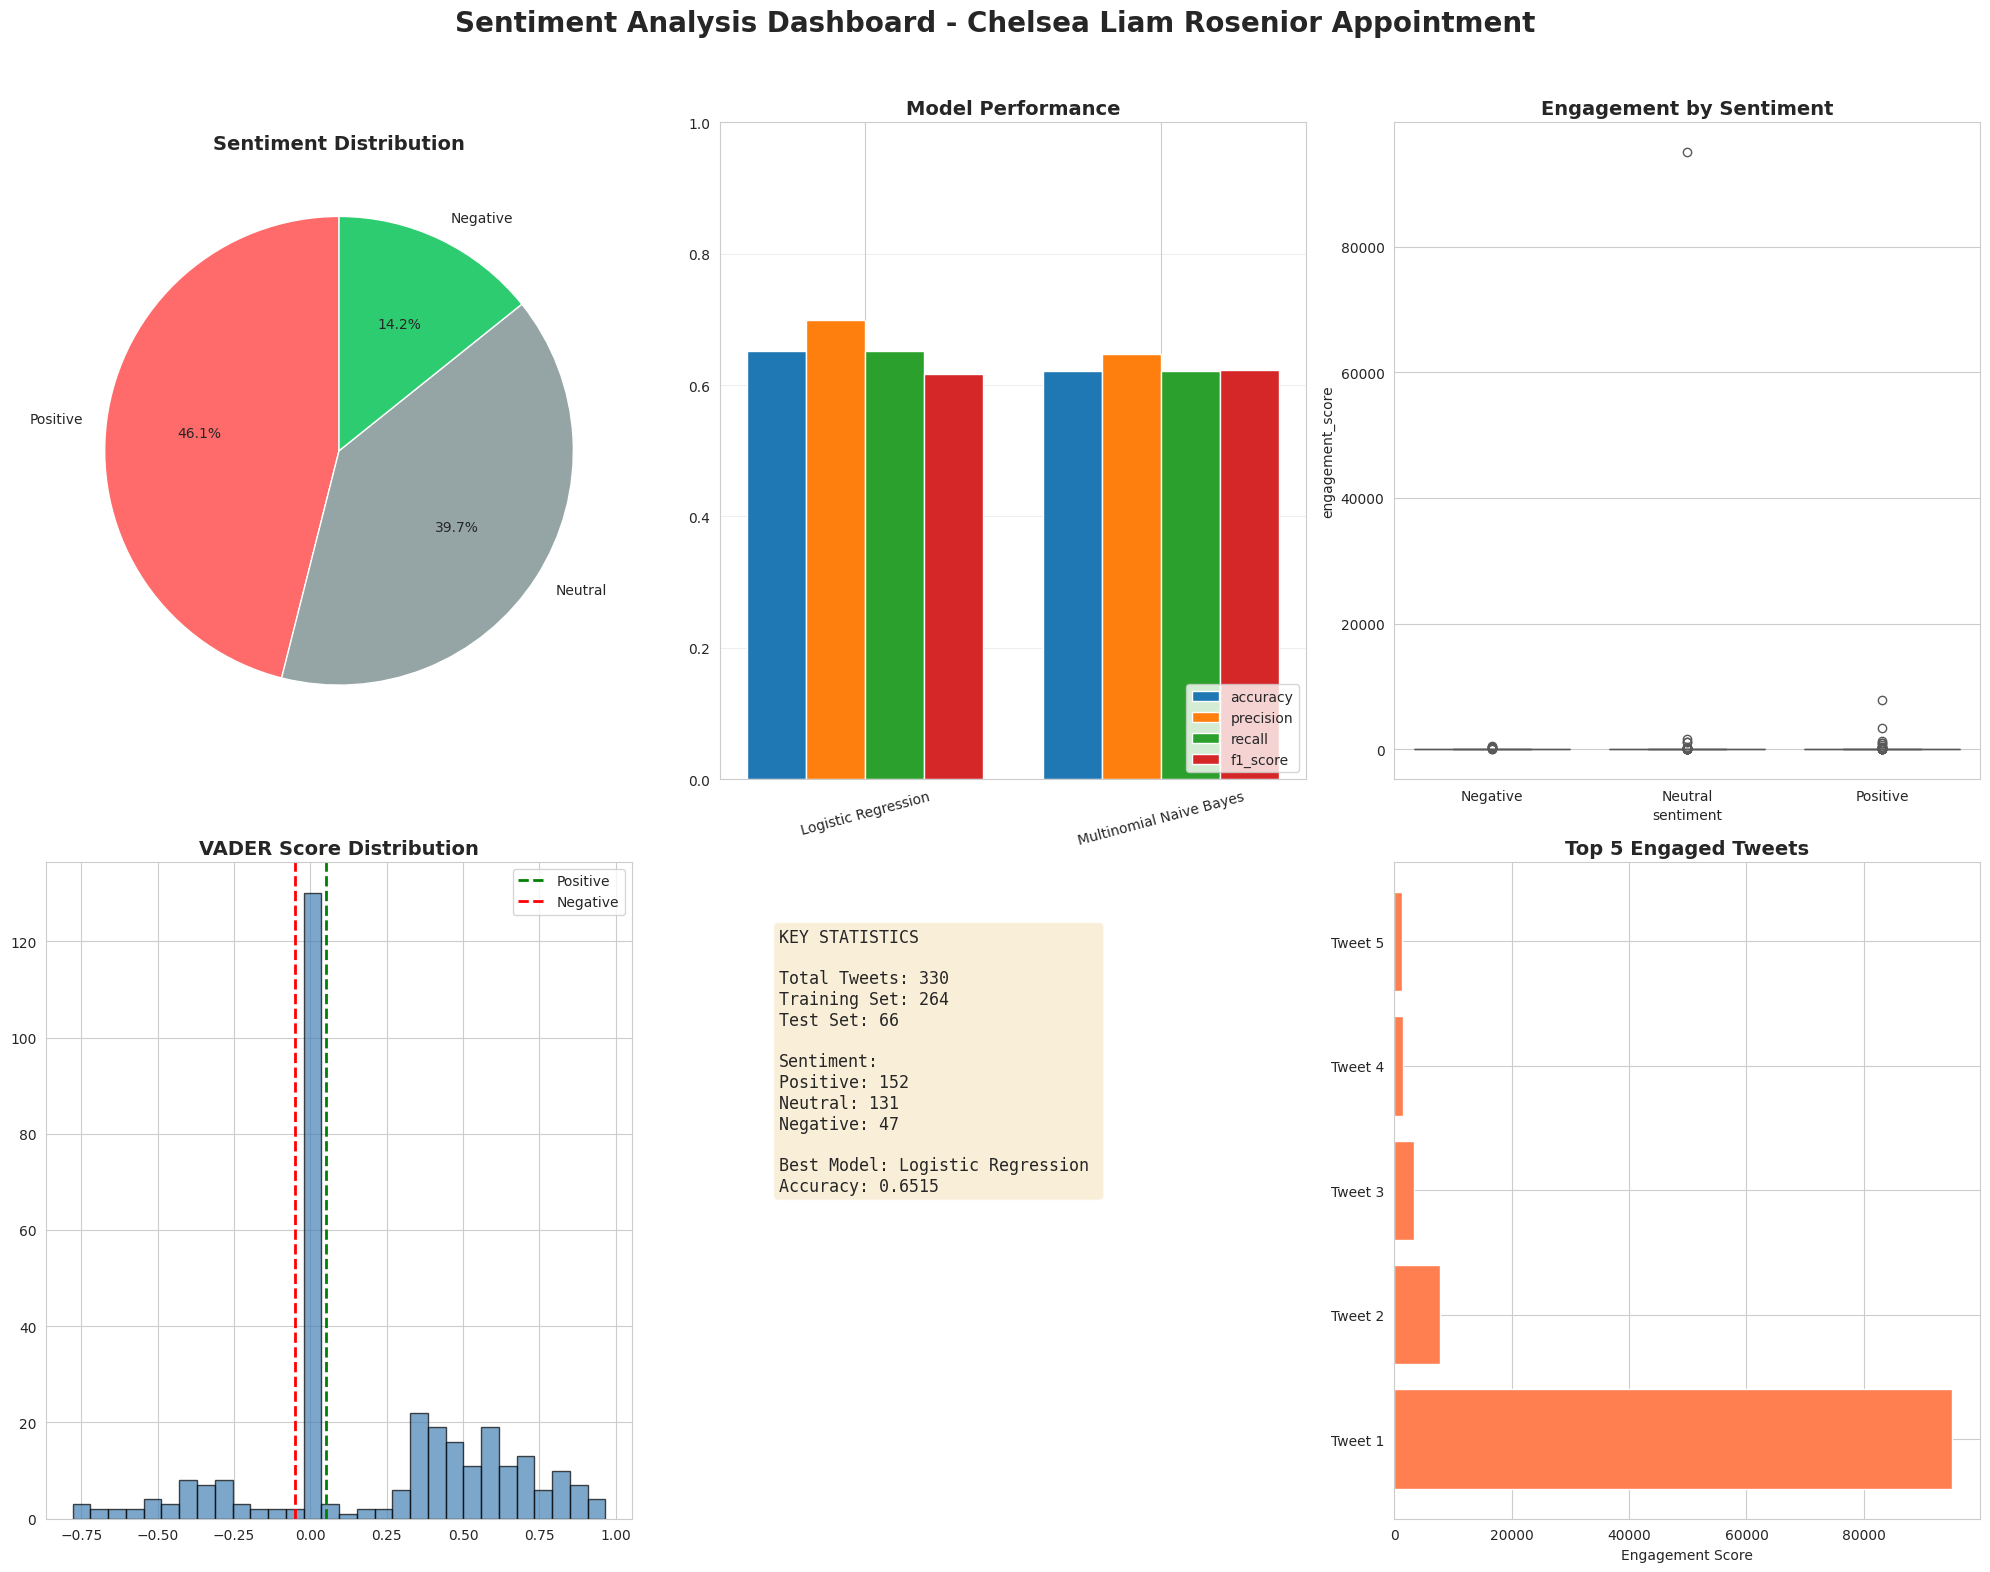

[OK] Executive dashboard saved


In [ ]:
# Create comprehensive dashboard
fig = plt.figure(figsize=(20, 16))

# Title
fig.suptitle('Sentiment Analysis Dashboard - Chelsea Liam Rosenior Appointment',
             fontsize=20, fontweight='bold', y=0.98)

# 1. Sentiment Distribution
ax1 = fig.add_subplot(2, 3, 1)
sentiment_counts = df['sentiment'].value_counts()
colors = ['#ff6b6b', '#95a5a6', '#2ecc71']
ax1.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax1.set_title('Sentiment Distribution', fontsize=14, fontweight='bold')

# 2. Model Comparison
ax2 = fig.add_subplot(2, 3, 2)
x = np.arange(len(model_comparison['model']))
width = 0.2
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
for i, metric in enumerate(metrics):
    ax2.bar(x + i*width, model_comparison[metric], width, label=metric)
ax2.set_xticks(x + width*1.5)
ax2.set_xticklabels(model_comparison['model'], rotation=15)
ax2.set_ylim([0, 1])
ax2.set_title('Model Performance', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3, axis='y')

# 3. Engagement by Sentiment
ax3 = fig.add_subplot(2, 3, 3)
sns.boxplot(
    x='sentiment',
    y='engagement_score',
    data=df,
    order=['Negative', 'Neutral', 'Positive'],
    hue='sentiment',
    palette='Set2',
    legend=False,
    ax=ax3
)
ax3.set_title('Engagement by Sentiment', fontsize=14, fontweight='bold')

# 4. VADER Score Distribution
ax4 = fig.add_subplot(2, 3, 4)
ax4.hist(df['vader_compound'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax4.axvline(x=0.05, color='green', linestyle='--', linewidth=2, label='Positive')
ax4.axvline(x=-0.05, color='red', linestyle='--', linewidth=2, label='Negative')
ax4.set_title('VADER Score Distribution', fontsize=14, fontweight='bold')
ax4.legend()

# 5. Key Statistics
ax5 = fig.add_subplot(2, 3, 5)
ax5.axis('off')
best_model = model_comparison.loc[model_comparison['accuracy'].idxmax(), 'model']
best_acc = model_comparison['accuracy'].max()
pos_count = (df['sentiment']=='Positive').sum()
neu_count = (df['sentiment']=='Neutral').sum()
neg_count = (df['sentiment']=='Negative').sum()
stats_text = (
    'KEY STATISTICS\n\n'
    'Total Tweets: {} \n'
    'Training Set: {} \n'
    'Test Set: {} \n\n'
    'Sentiment:\n'
    'Positive: {} \n'
    'Neutral: {} \n'
    'Negative: {} \n\n'
    'Best Model: {} \n'
    'Accuracy: {:.4f}'
).format(len(df), int(len(df)*0.8), int(len(df)*0.2), pos_count, neu_count, neg_count, best_model, best_acc)
ax5.text(0.1, 0.9, stats_text, transform=ax5.transAxes, fontsize=12,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 6. Top Engagement Tweets
ax6 = fig.add_subplot(2, 3, 6)
top_engaged = df.nlargest(5, 'engagement_score')['engagement_score']
ax6.barh(range(5), top_engaged.values, color='coral')
ax6.set_yticks(range(5))
ax6.set_yticklabels(['Tweet ' + str(i+1) for i in range(5)])
ax6.set_title('Top 5 Engaged Tweets', fontsize=14, fontweight='bold')
ax6.set_xlabel('Engagement Score')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/figures/executive_dashboard.png'), dpi=300, bbox_inches='tight')
plt.show()
print('[OK] Executive dashboard saved')

## 3. Generate Summary Tables

In [ ]:
# Create final summary
summary_data = {
    'Metric': ['Total Tweets', 'Training Set', 'Test Set', 'Positive', 'Neutral',
               'Negative', 'Best Model', 'Best Accuracy', 'Avg Engagement'],
    'Value': [len(df), int(len(df)*0.8), int(len(df)*0.2),
              (df['sentiment']=='Positive').sum(), (df['sentiment']=='Neutral').sum(),
              (df['sentiment']=='Negative').sum(), best_model, f"{best_acc:.4f}",
              f"{df['engagement_score'].mean():.2f}"]
}
summary_table = pd.DataFrame(summary_data)
summary_table.to_csv(utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/tables/final_summary.csv'), index=False)

print("Final Summary:")
print(summary_table.to_string(index=False))
print("Saved to outputs/tables/final_summary.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Final Summary:
        Metric               Value
  Total Tweets                 330
  Training Set                 264
      Test Set                  66
      Positive                 152
       Neutral                 131
      Negative                  47
    Best Model Logistic Regression
 Best Accuracy              0.6515
Avg Engagement              373.04
Saved to outputs/tables/final_summary.csv


## 4. Sample Tweets by Sentiment

In [ ]:
# Create sample tweets table
sample_tweets = []
for sentiment in ['Positive', 'Neutral', 'Negative']:
    sentiment_df = df[df['sentiment'] == sentiment].nlargest(3, 'engagement_score')
    for idx, row in sentiment_df.iterrows():
        sample_tweets.append({
            'Sentiment': sentiment,
            'Tweet': row['Tweet Content'][:150],
            'VADER_Score': round(row['vader_compound'], 3)
        })

sample_df = pd.DataFrame(sample_tweets)
sample_df.to_csv(utils.get_outputs_path('/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/tables/sample_tweets.csv'), index=False)

print("Sample tweets saved to outputs/tables/sample_tweets.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Sample tweets saved to outputs/tables/sample_tweets.csv


## 5. List All Output Files

In [ ]:
print("Output Files:")
# Get the base output directory path
base_output_directory = "/content/analisis-sentiment-pelatih-baru-chelsea-liam-rosenior/outputs/"

for sub_dir_name in ['figures', 'tables', 'models', 'metrics']:
    # Construct the full path to the current subdirectory
    current_dir_full_path = os.path.join(base_output_directory, sub_dir_name)
    print(f"\n{sub_dir_name}/")
    if os.path.exists(current_dir_full_path):
        files_in_dir = os.listdir(current_dir_full_path)
        if files_in_dir: # Check if directory is not empty
            for f in sorted(files_in_dir):
                print(f"  - {f}")
        else:
            print("  (directory is empty)")
    else:
        print("  (directory not found - run previous notebooks)")

Output Files:

figures/
  - compound_score_distribution.png
  - engagement_distribution.png
  - executive_dashboard.png
  - feature_importance.png
  - lr_confusion_matrix.png
  - model_comparison.png
  - nb_confusion_matrix.png
  - ngrams.png
  - sentiment_by_engagement.png
  - sentiment_distribution.png
  - text_statistics.png
  - top_words.png
  - tweets_by_hour.png
  - wordcloud.png

tables/
  - eda_summary.csv
  - final_summary.csv
  - model_comparison.csv
  - sample_tweets.csv
  - sentiment_summary.csv

models/
  - count_vectorizer.pkl
  - tfidf_vectorizer.pkl

metrics/
  (directory is empty)
